## 1. Problem Statement

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dd = pd.read_excel('Customer Churn Data.xlsx')

In [4]:
dd.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Variable,Description
1,NaN,AccountID,account unique identifier
2,NaN,Churn,account churn flag (Target)
3,NaN,Tenure,Tenure of account
4,NaN,City_Tier,Tier of primary customer's city


In [5]:
dd.drop('Unnamed: 0',axis=1)

,Unnamed: 1,Unnamed: 2
0,Variable,Description
1,AccountID,account unique identifier
2,Churn,account churn flag (Target)
3,Tenure,Tenure of account
4,City_Tier,Tier of primary customer's city
5,CC_Contacted_L12m,How many times all the customers of the accoun...
6,Payment,Preferred Payment mode of the customers in the...
7,Gender,Gender of the primary customer of the account
8,Service_Score,Satisfaction score given by customers of the a...
9,Account_user_count,Number of customers tagged with this account


In [6]:
pd.reset_option('max_columns')

In [7]:
df = pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')

## 2)Data Report

In [8]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [9]:
df.iloc[:,0:10]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus
...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super


In [10]:
df.drop('AccountID',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [12]:
for i in df.columns:
        print(df[i].value_counts())

0    9364
1    1896
Name: Churn, dtype: int64
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
4

In [13]:
df.duplicated().sum()

259

In [14]:
df.describe()

,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [15]:
df.describe(include=['O']).T

,count,unique,top,freq
Tenure,11158,38,1,1351
Payment,11151,5,Debit Card,4587
Gender,11152,4,Male,6328
Account_user_count,11148,7,4,4569
account_segment,11163,7,Super,4062
Marital_Status,11048,3,Married,5860
rev_per_month,11158,59,3,1746
rev_growth_yoy,11260,20,14,1524
coupon_used_for_payment,11260,20,1,4373
Day_Since_CC_connect,10903,24,3,1816


In [16]:
num = []
for i in df.columns:
    if df[i].dtype!='object':
        num.append(df[i])

In [17]:
df_num = pd.DataFrame(num).T

In [18]:
cat = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(df[i])

In [19]:
df_cat = pd.DataFrame(cat).T

## 3. Data Preprocessing

In [20]:
df['Tenure'].value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [22]:
df['Tenure'] = np.where(df['Tenure']=='#',32,df['Tenure'])

In [23]:
df['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [24]:
df['Gender'] = np.where(df['Gender']=='M','Male',df['Gender'])

In [25]:
df['Gender'] = np.where(df['Gender']=='F','Female',df['Gender'])

In [26]:
df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [27]:
df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [28]:
df['Account_user_count'] = np.where(df['Account_user_count']=='@',7,df['Account_user_count'])

In [29]:
df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
7     332
6     315
Name: Account_user_count, dtype: int64

In [30]:
df['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [31]:
df['account_segment'] = np.where(df['account_segment']=='Regular +','Regular Plus',df['account_segment'])

In [32]:
df['account_segment'] = np.where(df['account_segment']=='Super +','Super Plus',df['account_segment'])

In [33]:
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [34]:
df['CC_Agent_Score'].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [35]:
df['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [36]:
df['rev_per_month'].value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [37]:
df[df['rev_per_month']==16]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [38]:
df['rev_per_month'] = np.where(df['rev_per_month']=='+',16,df['rev_per_month'])

In [39]:
df['rev_per_month'].value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
16      689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [40]:
df['Complain_ly'].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [41]:
df['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [42]:
df['rev_growth_yoy'] = np.where(df['rev_growth_yoy']=='$',29,df['rev_growth_yoy'])

In [43]:
df['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
29       3
4        3
Name: rev_growth_yoy, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [45]:
df['coupon_used_for_payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [46]:
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment']=='#',17,df['coupon_used_for_payment'])

In [47]:
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment']=='$',18,df['coupon_used_for_payment'])

In [48]:
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment']=='*',19,df['coupon_used_for_payment'])

In [49]:
df['coupon_used_for_payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
17       1
18       1
19       1
Name: coupon_used_for_payment, dtype: int64

In [50]:
df['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [51]:
df[df['Day_Since_CC_connect']==19]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [52]:
df['Day_Since_CC_connect'] = np.where(df['Day_Since_CC_connect']=='$',19,df['Day_Since_CC_connect'])

In [53]:
df['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
19       1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [54]:
df['cashback'].value_counts()

155.62    10
149.36     9
154.73     9
145.08     9
149.68     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: cashback, Length: 5693, dtype: int64

In [55]:
df[df['cashback']=='$']

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
440,0,0,1.0,16.0,Credit Card,Male,3.0,2,Regular Plus,3.0,Single,2,0.0,18,1,2,$,Mobile
1257,0,4,1.0,9.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Married,16,NaN,13,0,3,$,Computer


In [56]:
df['cashback'] = np.where(df['cashback']=='$',df['cashback'].mode(),df['cashback'])

In [57]:
df['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [58]:
df['Login_device'] = np.where(df['Login_device']=='&&&&','Other',df['Login_device'])

In [59]:
df['Login_device'].value_counts()

Mobile      7482
Computer    3018
Other        539
Name: Login_device, dtype: int64

### Missing value Treatment

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [61]:
df['Tenure'].isnull().sum()

102

In [62]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [63]:
df['Tenure'].isnull().sum()

0

In [64]:
df['City_Tier'].isnull().sum()

112

In [65]:
df['City_Tier'].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [66]:
df['City_Tier'].fillna(1.0,inplace=True)

In [67]:
df['City_Tier'].isnull().sum()

0

In [68]:
df['CC_Contacted_LY'].isnull().sum()

102

In [69]:
df['CC_Contacted_LY'].value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Contacted_LY, dtype: int64

In [70]:
df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median(),inplace=True)

In [71]:
df['CC_Contacted_LY'].isnull().sum()

0

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [73]:
df['Payment'].isnull().sum()

109

In [74]:
df['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [75]:
df['Payment'].fillna('Debit Card',inplace=True)

In [76]:
df['Payment'].isnull().sum()

0

In [77]:
df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [78]:
df['Gender'].fillna('Male',inplace=True)

In [79]:
df['Gender'].isnull().sum()

0

In [80]:
df['Service_Score'].isnull().sum()

98

In [81]:
df['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [82]:
df['Service_Score'].fillna(df['Service_Score'].median(),inplace=True)

In [83]:
df['Service_Score'].isnull().sum()

0

In [84]:
df['Account_user_count'].isnull().sum()

112

In [85]:
df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
7     332
6     315
Name: Account_user_count, dtype: int64

In [86]:
df['Account_user_count'].fillna(df['Account_user_count'].median(),inplace=True)

In [87]:
df['Account_user_count'].isnull().sum()

0

In [88]:
df['account_segment'].isnull().sum()

97

In [89]:
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [90]:
df['account_segment'].fillna('Regular Plus',inplace=True)

In [91]:
df['account_segment'].isnull().sum()

0

In [92]:
df['CC_Agent_Score'].isnull().sum()

116

In [93]:
df['CC_Agent_Score'].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [94]:
df['CC_Agent_Score'].fillna(3.0,inplace=True)

In [95]:
df['CC_Agent_Score'].isnull().sum()

0

In [96]:
df['Marital_Status'].isnull().sum()

212

In [97]:
df['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [98]:
df['Marital_Status'].fillna('Married',inplace=True)

In [99]:
df['Marital_Status'].isnull().sum()

0

In [100]:
df['rev_per_month'].isnull().sum()

102

In [101]:
df['rev_per_month'].fillna(df['rev_per_month'].median(),inplace=True)

In [102]:
df['rev_per_month'].isnull().sum()

0

In [103]:
df['Complain_ly'].isnull().sum()

357

In [104]:
df['Complain_ly'].fillna(df['Complain_ly'].median(),inplace=True)

In [105]:
df['Complain_ly'].isnull().sum()

0

In [106]:
df['Day_Since_CC_connect'].isnull().sum()

357

In [107]:
df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median(),inplace=True)

In [108]:
df['cashback'].isnull().sum()

471

In [109]:
df['cashback'].fillna(df['cashback'].median(),inplace=True)

In [110]:
df['Login_device'].isnull().sum()

221

In [111]:
df['Login_device'].value_counts()

Mobile      7482
Computer    3018
Other        539
Name: Login_device, dtype: int64

In [112]:
df['Login_device'].fillna('Mobile',inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [114]:
### To change continous variables from object data type to numerical data type
# cashback,rev_growth_yoy, rev_per_month
df['rev_growth_yoy'].astype('float64')

0        11.0
1        15.0
2        14.0
3        23.0
4        11.0
         ... 
11255    19.0
11256    16.0
11257    22.0
11258    16.0
11259    13.0
Name: rev_growth_yoy, Length: 11260, dtype: float64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [116]:
num = ['Account_user_count','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect']

In [117]:
num2 = ['Tenure','CC_Contacted_LY','rev_per_month','cashback','Account_user_count','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect']

In [118]:
df_num = pd.DataFrame(df[num])
df_num

,Account_user_count,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect
0,3.0,11,1,5.0
1,4.0,15,0,0.0
2,4.0,14,0,3.0
3,4.0,23,0,3.0
4,3.0,11,1,3.0
...,...,...,...,...
11255,2.0,19,1,4.0
11256,5.0,16,1,8.0
11257,2.0,22,1,4.0
11258,5.0,16,2,9.0


In [119]:
cat = ['Churn','City_Tier','Payment','Gender','Service_Score','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device']

In [120]:
df_cat = pd.DataFrame(df[cat])
df_cat

,Churn,City_Tier,Payment,Gender,Service_Score,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Login_device
0,1,3.0,Debit Card,Female,3.0,Super,2.0,Single,1.0,Mobile
1,1,1.0,UPI,Male,3.0,Regular Plus,3.0,Single,1.0,Mobile
2,1,1.0,Debit Card,Male,2.0,Regular Plus,3.0,Single,1.0,Mobile
3,1,3.0,Debit Card,Male,2.0,Super,5.0,Single,0.0,Mobile
4,1,1.0,Credit Card,Male,2.0,Regular Plus,5.0,Single,0.0,Mobile
...,...,...,...,...,...,...,...,...,...,...
11255,0,1.0,Credit Card,Male,3.0,Super,1.0,Married,0.0,Computer
11256,0,1.0,Credit Card,Male,3.0,HNI,5.0,Married,0.0,Mobile
11257,0,1.0,Debit Card,Male,3.0,Super,4.0,Married,1.0,Mobile
11258,0,3.0,Credit Card,Male,4.0,Super,4.0,Married,0.0,Computer


In [121]:
df['account_segment'].value_counts(normalize=True)

Regular Plus    0.374867
Super           0.360746
HNI             0.145560
Super Plus      0.072647
Regular         0.046181
Name: account_segment, dtype: float64

In [122]:
df['Gender'].value_counts(normalize=True)

Male      0.604973
Female    0.395027
Name: Gender, dtype: float64

In [123]:
df['City_Tier'].value_counts(normalize=True)

1.0    0.654973
3.0    0.302398
2.0    0.042629
Name: City_Tier, dtype: float64

In [124]:
df['Payment'].value_counts(normalize=True)

Debit Card          0.417052
Credit Card         0.311812
E wallet            0.108082
Cash on Delivery    0.090053
UPI                 0.073002
Name: Payment, dtype: float64

In [125]:
df['Marital_Status'].value_counts(normalize=True)

Married     0.539254
Single      0.312611
Divorced    0.148135
Name: Marital_Status, dtype: float64

In [126]:
df['Login_device'].value_counts(normalize=True)

Mobile      0.684103
Computer    0.268028
Other       0.047869
Name: Login_device, dtype: float64

In [127]:
df['Complain_ly'].value_counts(normalize=True)

0.0    0.723712
1.0    0.276288
Name: Complain_ly, dtype: float64

In [128]:
df['CC_Agent_Score'].value_counts(normalize=True)

3.0    0.308703
1.0    0.204440
5.0    0.194583
4.0    0.188899
2.0    0.103375
Name: CC_Agent_Score, dtype: float64

## 4) Exploratory data analysis

## Univariate Analysis

<AxesSubplot:>

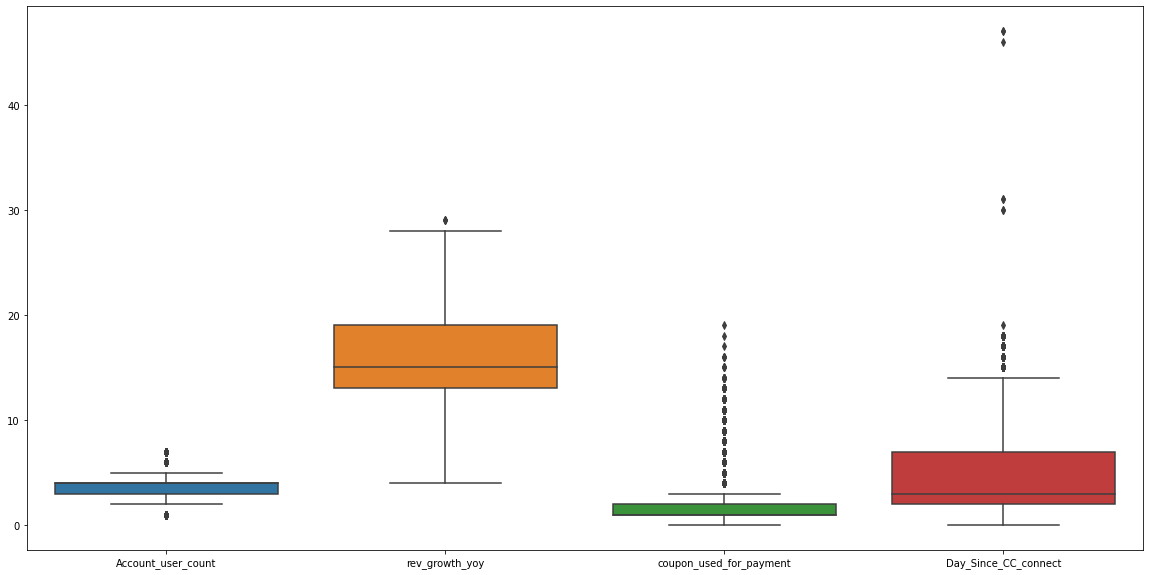

In [129]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df_num)

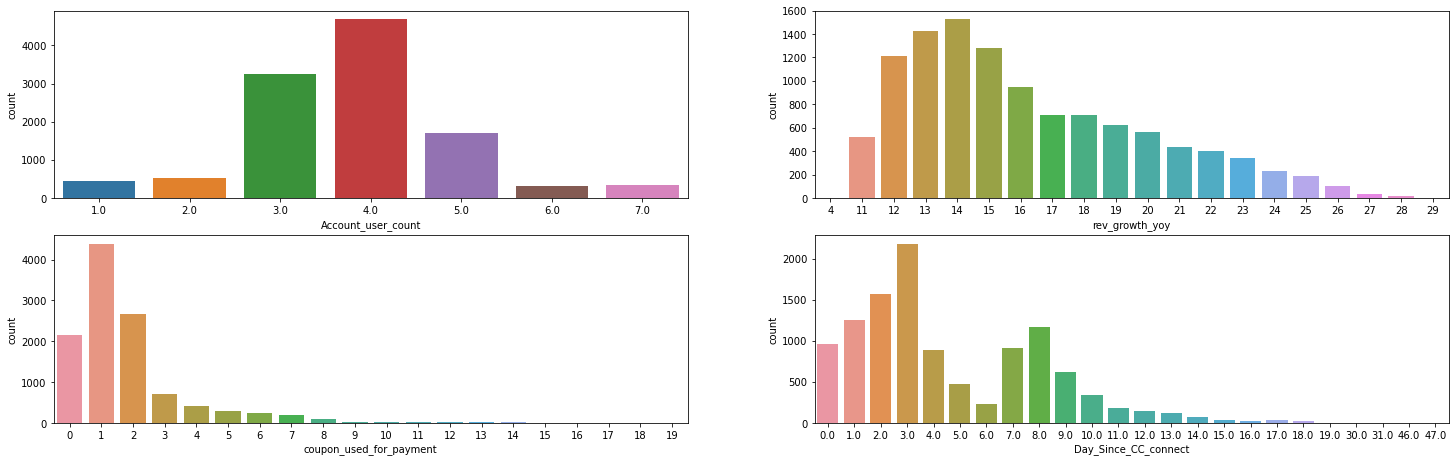

In [130]:
plt.figure(figsize=(25,20))
for i in range(len(df_num.columns)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df_num[df_num.columns[i]])

In [131]:
# plt.figure(figsize=(20,10))
# for i in range(len(df_num.columns)):
#     plt.subplot(3,2,i+1)
#     sns.countplot(x=df_num[df_num.columns[i]])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

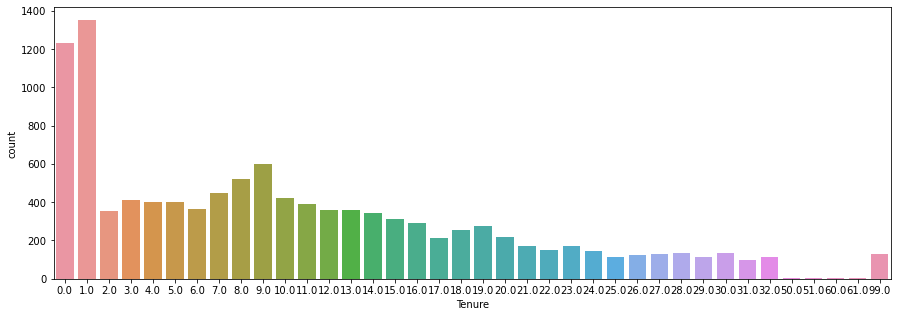

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Tenure'])

<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='count'>

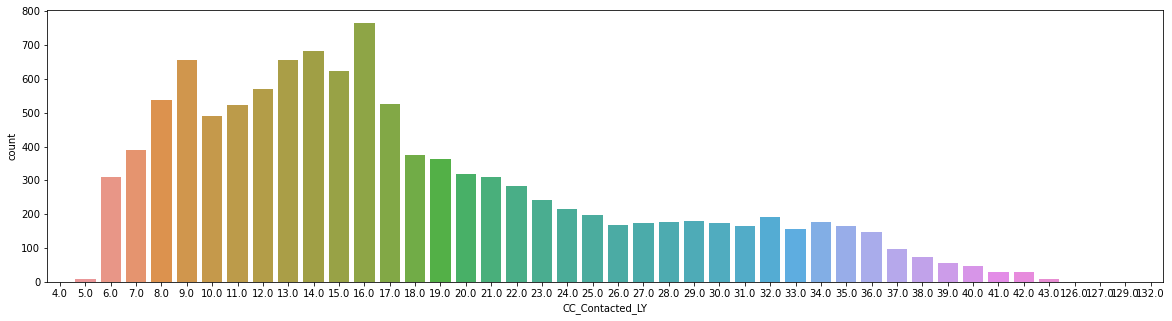

In [133]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['CC_Contacted_LY'])

<AxesSubplot:xlabel='rev_per_month', ylabel='Count'>

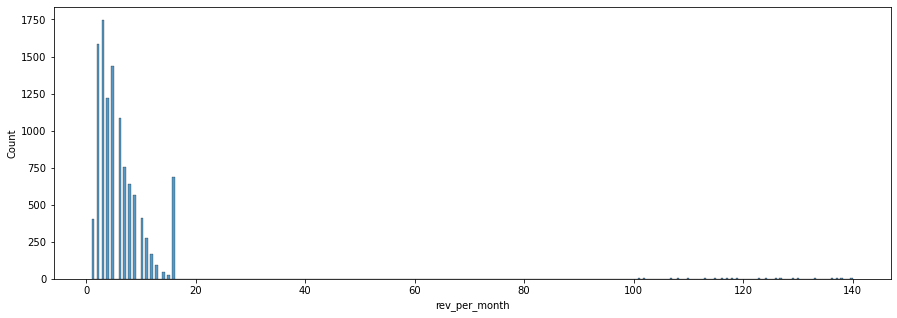

In [134]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['rev_per_month'])

<AxesSubplot:xlabel='cashback', ylabel='Count'>

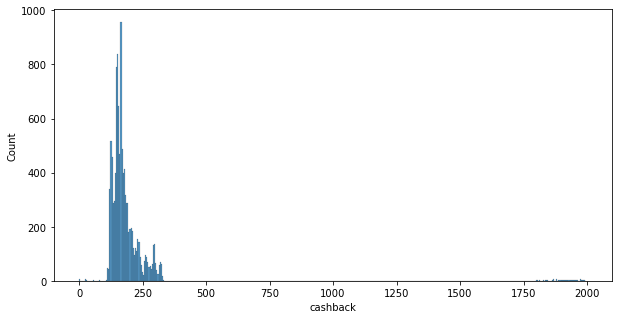

In [135]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['cashback'])

In [136]:
## Univariate CATEGORICAL variables.

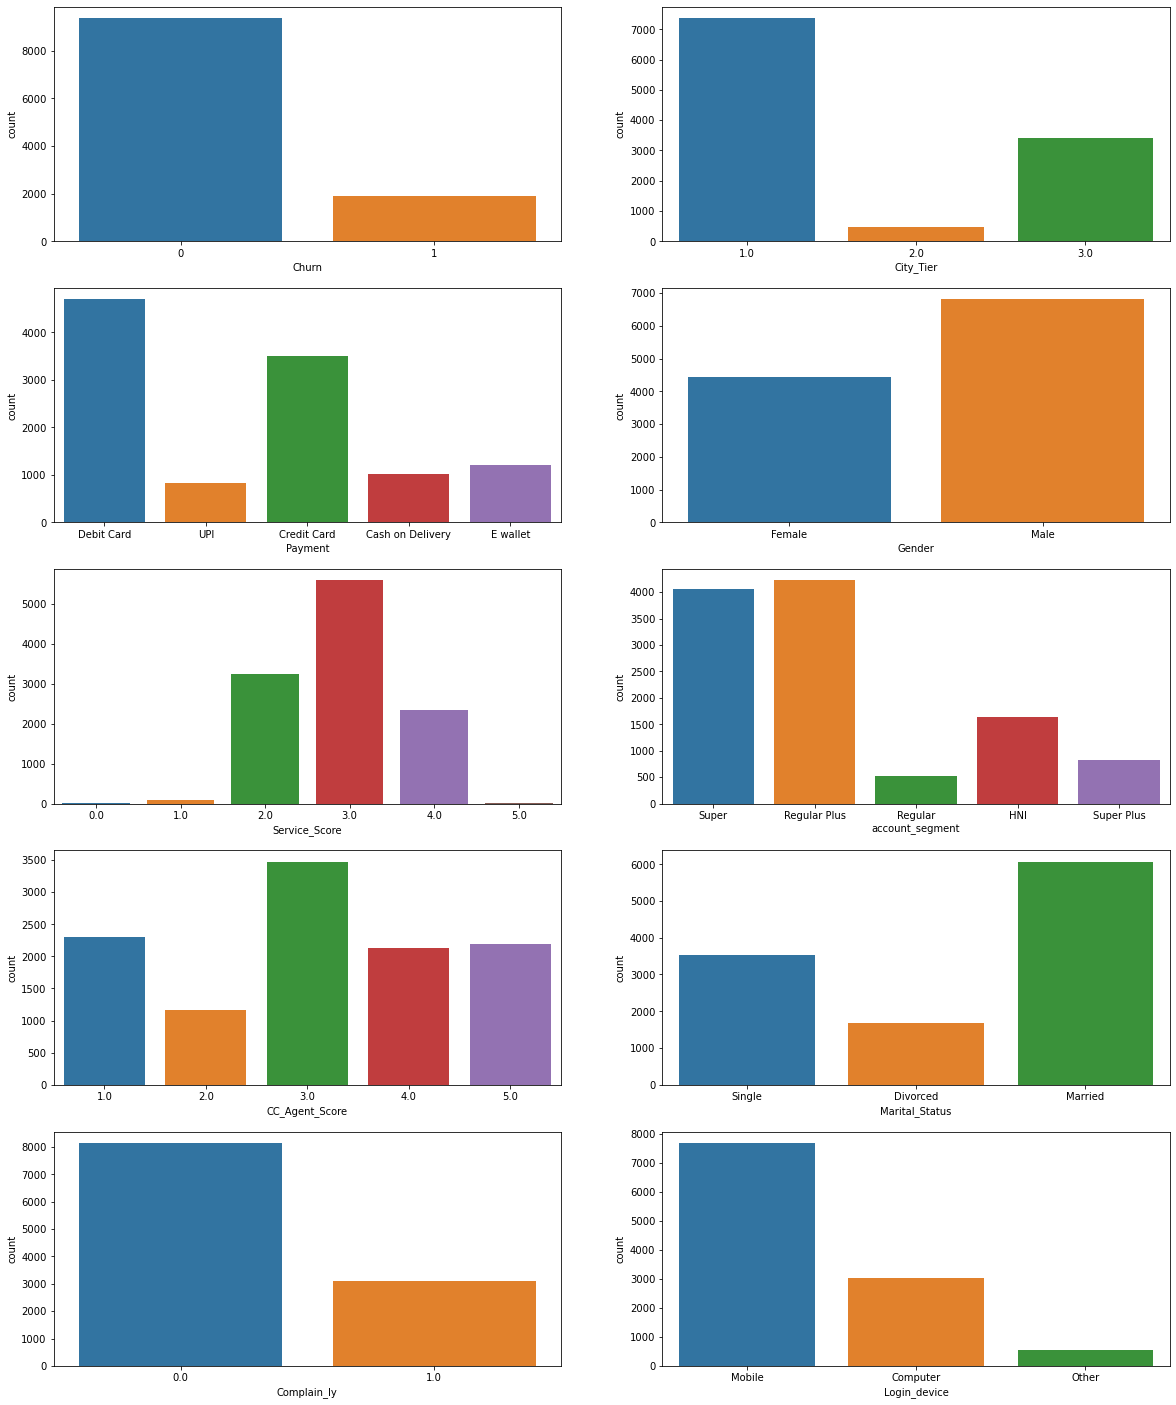

In [137]:
plt.figure(figsize=(20,25))
for i in range(len(df_cat.columns)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df_cat[df_cat.columns[i]])

### Bivariate Analysis

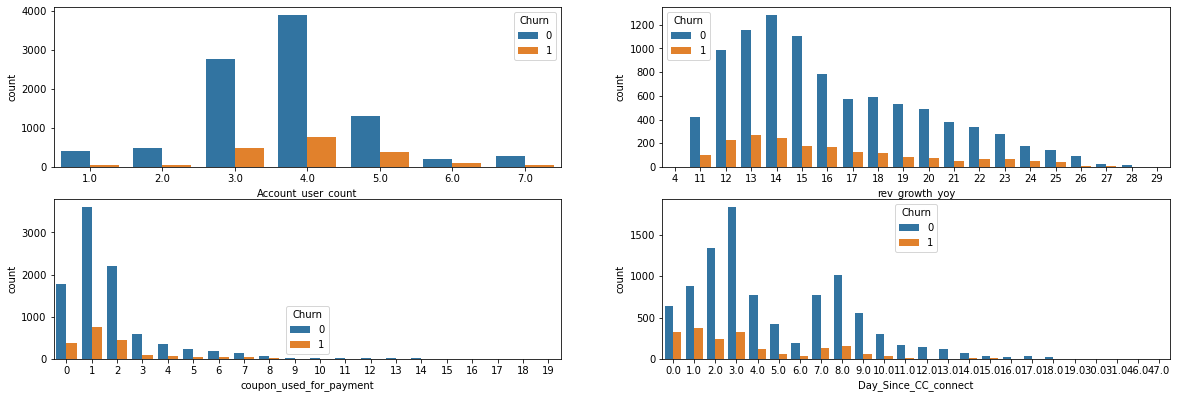

In [138]:
plt.figure(figsize=(20,10))
for i in range(len(df_num.columns)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df_num[df_num.columns[i]],hue=df['Churn'])

In [139]:
df_new = df[['Tenure','CC_Contacted_LY','rev_per_month']]

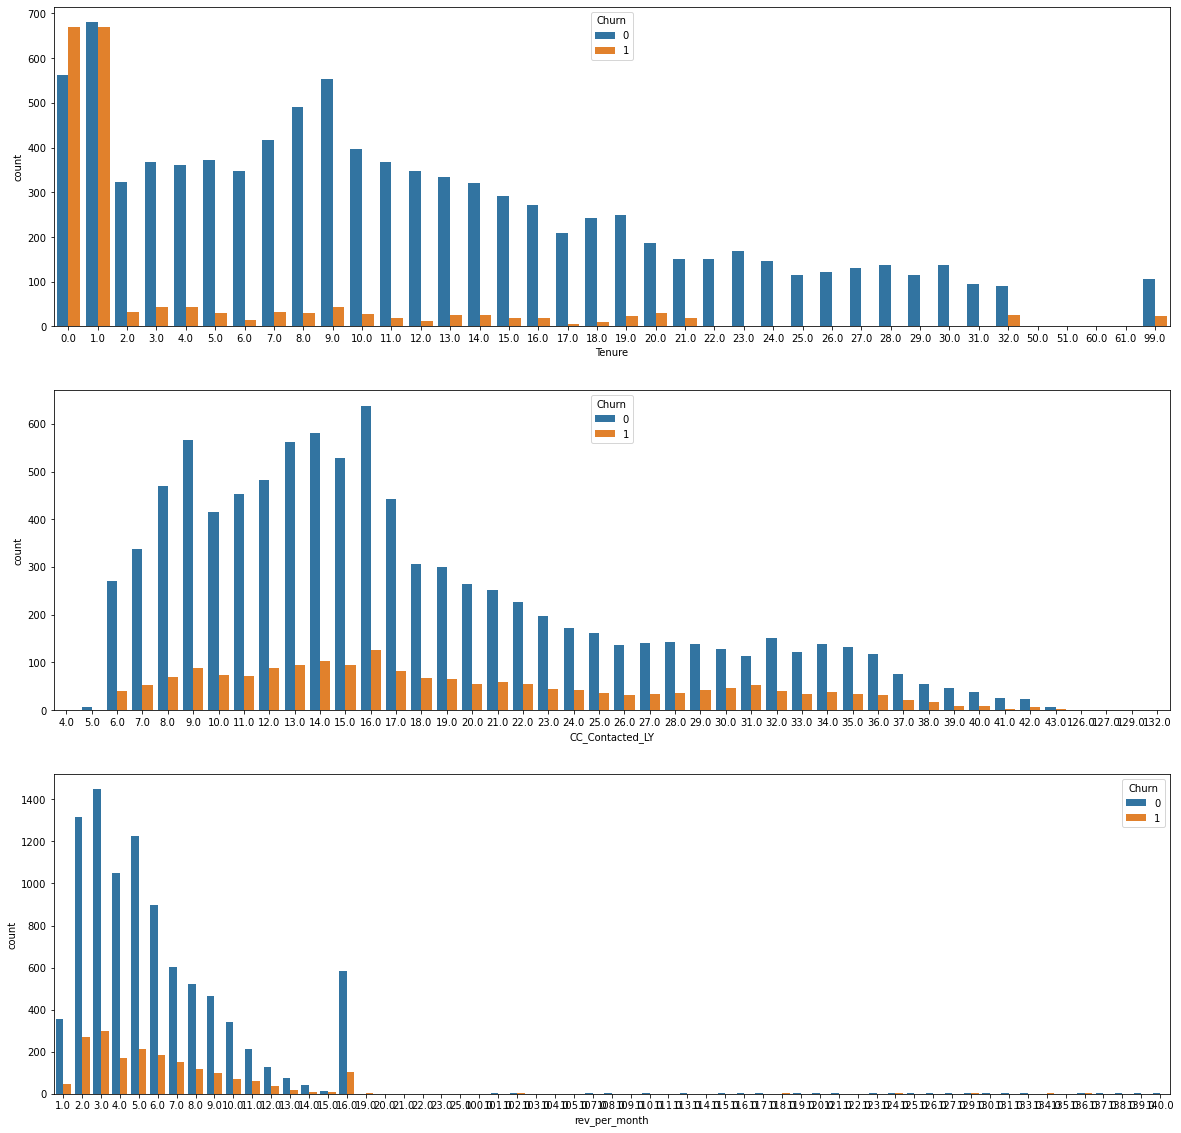

In [140]:
plt.figure(figsize=(20,20))
for i in range(len(df_new.columns)):
    plt.subplot(3,1,i+1)
    sns.countplot(x=df_new[df_new.columns[i]],hue=df['Churn'])

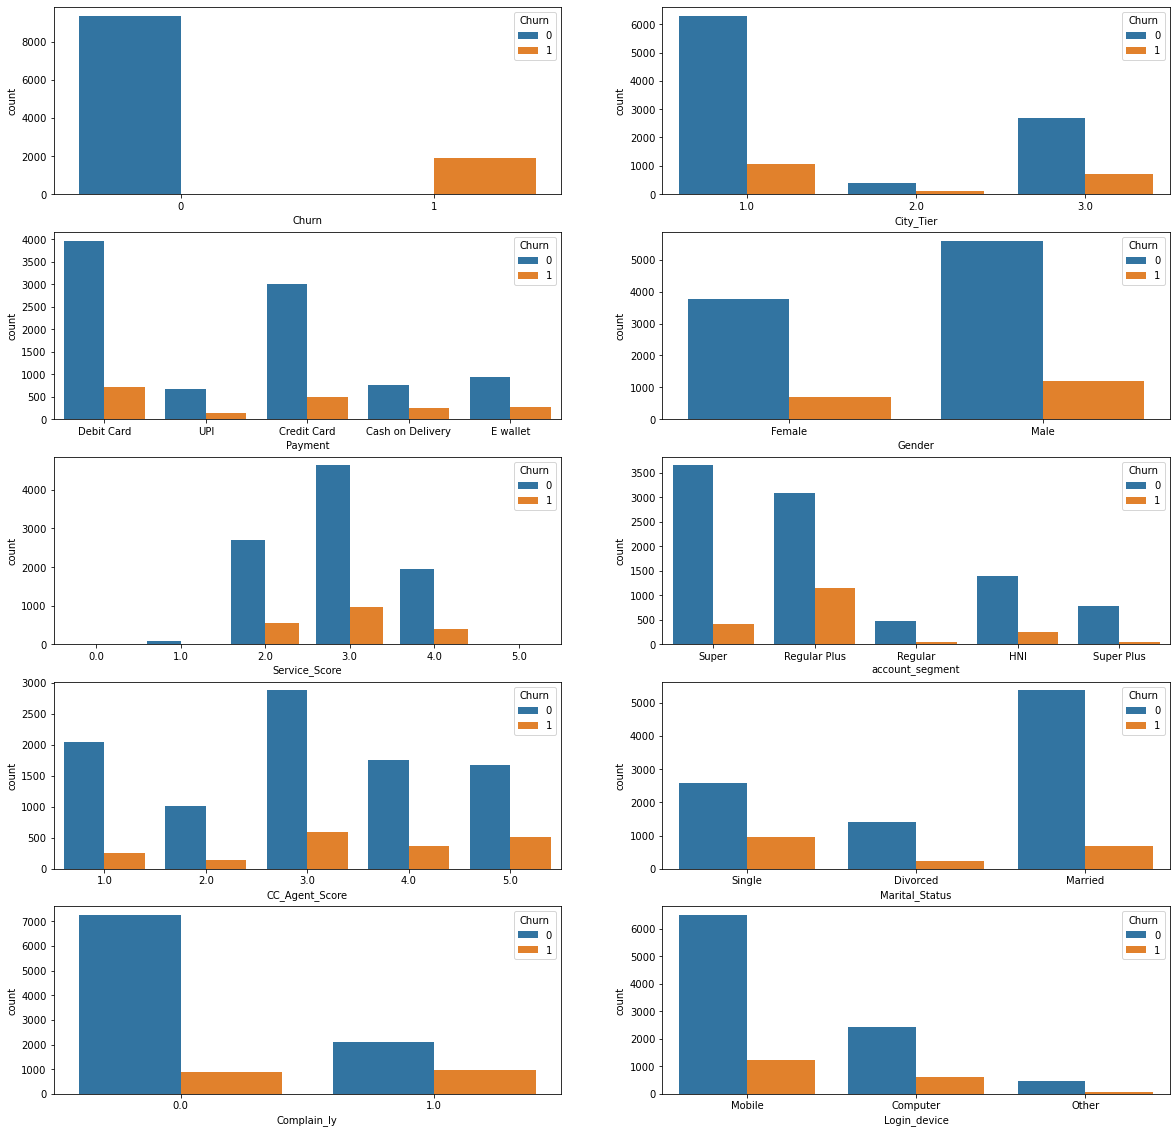

In [141]:
plt.figure(figsize=(20,20))
for i in range(len(df_cat.columns)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df_cat[df_cat.columns[i]],hue=df['Churn'])

In [142]:
df_num2 = pd.DataFrame(df[num2])
df_num2

,Tenure,CC_Contacted_LY,rev_per_month,cashback,Account_user_count,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect
0,4.0,6.0,9.0,159.93,3.0,11,1,5.0
1,0.0,8.0,7.0,120.90,4.0,15,0,0.0
2,0.0,30.0,6.0,165.24,4.0,14,0,3.0
3,0.0,15.0,8.0,134.07,4.0,23,0,3.0
4,0.0,12.0,3.0,129.60,3.0,11,1,3.0
...,...,...,...,...,...,...,...,...
11255,10.0,34.0,9.0,153.71,2.0,19,1,4.0
11256,13.0,19.0,7.0,226.91,5.0,16,1,8.0
11257,1.0,14.0,7.0,191.42,2.0,22,1,4.0
11258,23.0,11.0,7.0,179.90,5.0,16,2,9.0


## Multivariate Analysis

<AxesSubplot:>

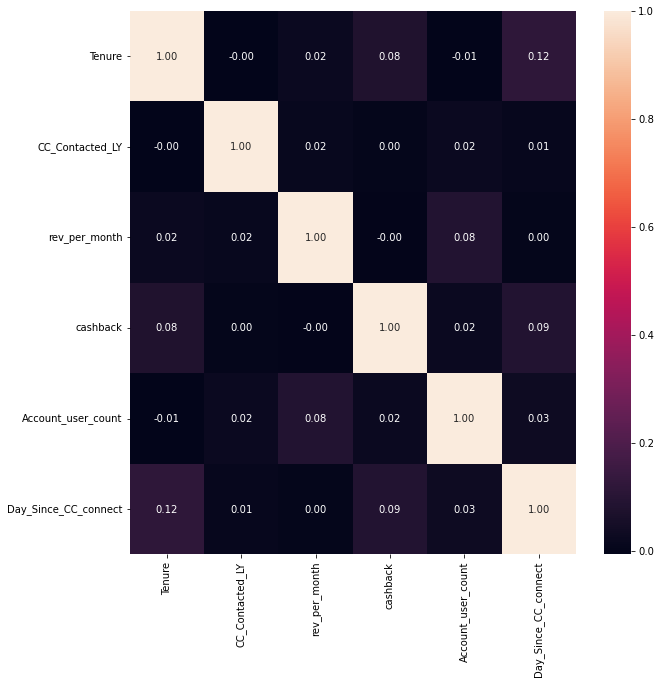

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num2.corr(),annot=True,fmt='0.2f')

## Outliers check

<AxesSubplot:>

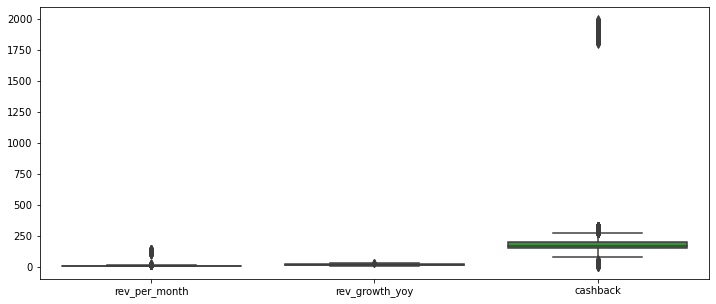

In [144]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df[['rev_per_month','rev_growth_yoy','cashback']])

In [145]:
def treat_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3-q1
    ur = q3+(1.25*IQR)
    lr = q1-(1.25*IQR)
    return lr,ur

In [146]:
lr,ur = treat_outliers(df['rev_per_month'])
df[df['rev_per_month']>ur]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
19,1,19.0,1.0,20.0,Debit Card,Female,3.0,3.0,Regular Plus,4.0,Divorced,16.0,0.0,18,1,3.0,149.63,Mobile
38,0,30.0,1.0,30.0,Debit Card,Male,2.0,2.0,HNI,2.0,Married,16.0,0.0,16,1,4.0,194.39,Mobile
60,0,6.0,1.0,20.0,Credit Card,Female,3.0,3.0,Regular Plus,4.0,Divorced,16.0,0.0,13,0,6.0,127.56,Mobile
65,0,25.0,1.0,6.0,Debit Card,Male,3.0,4.0,Regular,3.0,Divorced,16.0,0.0,14,1,9.0,299.99,Mobile
69,0,18.0,1.0,8.0,Credit Card,Male,3.0,4.0,Super Plus,2.0,Divorced,130.0,0.0,23,9,8.0,267.92,Computer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,0,16.0,1.0,37.0,Debit Card,Male,3.0,5.0,Super,3.0,Single,16.0,0.0,13,4,8.0,171.32,Computer
11197,0,1.0,1.0,10.0,Debit Card,Male,3.0,7.0,Super,3.0,Single,16.0,0.0,15,2,3.0,175.17,Other
11203,0,1.0,1.0,13.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Married,16.0,0.0,20,1,3.0,170.77,Mobile
11227,0,13.0,1.0,20.0,Debit Card,Male,3.0,4.0,Regular,1.0,Single,16.0,0.0,15,2,4.0,325.31,Computer


In [147]:
df[df['rev_per_month']<lr]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


<AxesSubplot:xlabel='rev_per_month', ylabel='Count'>

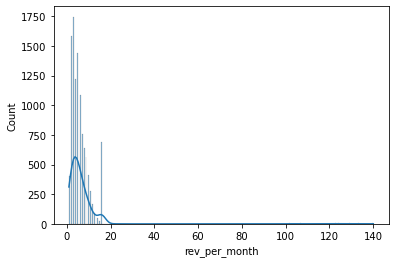

In [148]:
# Distribution of variable before treating outlier
sns.histplot(x = df['rev_per_month'],kde=True)

In [149]:
df_o = df

In [150]:
df_o['rev_per_month_new'] = df['rev_per_month']

In [151]:
df_o['rev_per_month_new'] = np.where(df['rev_per_month']>ur,ur,df['rev_per_month']) 

<AxesSubplot:xlabel='rev_per_month_new', ylabel='Count'>

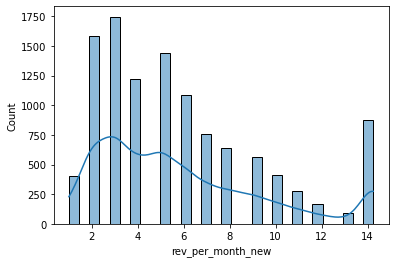

In [152]:
# Distribution of variable after treating outlier
sns.histplot(x = df['rev_per_month_new'],kde=True)

In [153]:
df['rev_per_month'] = np.where(df['rev_per_month']>ur,ur,df['rev_per_month']) 

In [154]:
lr,ur = treat_outliers(df['rev_growth_yoy'])

In [155]:
df[df['rev_growth_yoy']>26.5]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_month_new
3127,0,4.0,3.0,14.0,E wallet,Male,3.0,4.0,Regular Plus,4.0,Single,2.00,0.0,29,2,3.0,154.83,Mobile,2.00
5837,0,27.0,1.0,29.0,Debit Card,Female,2.0,3.0,Super,3.0,Single,7.00,0.0,29,1,3.0,151.69,Computer,7.00
5939,0,4.0,1.0,19.0,Debit Card,Male,2.0,3.0,HNI,4.0,Married,3.00,0.0,27,1,8.0,210.48,Mobile,3.00
6329,0,15.0,1.0,41.0,Credit Card,Male,2.0,5.0,Super,2.0,Single,5.00,0.0,29,1,0.0,145.72,Mobile,5.00
6380,0,17.0,1.0,38.0,UPI,Male,2.0,3.0,Super,2.0,Single,2.00,0.0,27,1,17.0,148.41,Mobile,2.00
6397,1,9.0,1.0,18.0,Credit Card,Female,3.0,4.0,Regular Plus,4.0,Single,3.00,1.0,27,1,0.0,118.59,Computer,3.00
6580,0,5.0,1.0,18.0,Credit Card,Male,0.0,3.0,HNI,1.0,Single,4.00,0.0,27,0,0.0,215.44,Mobile,4.00
6671,0,21.0,1.0,12.0,Credit Card,Male,2.0,4.0,Super Plus,1.0,Married,3.00,0.0,27,2,2.0,256.02,Computer,3.00
6703,0,6.0,3.0,25.0,Debit Card,Female,2.0,3.0,Super,1.0,Married,4.00,1.0,27,0,2.0,154.68,Computer,4.00
7153,0,19.0,3.0,8.0,E wallet,Female,3.0,3.0,HNI,5.0,Married,5.00,0.0,27,8,7.0,204.53,Mobile,5.00


In [156]:
df[df['rev_growth_yoy']<10]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_month_new
4253,0,20.0,1.0,7.0,Credit Card,Male,3.0,5.0,HNI,5.0,Married,4.0,1.0,4,5,6.0,231.73,Computer,4.0
4853,1,1.0,3.0,10.0,Debit Card,Male,3.0,5.0,HNI,1.0,Married,3.0,1.0,4,4,8.0,228.25,Mobile,3.0
5597,0,13.0,1.0,16.0,Debit Card,Male,3.0,4.0,Regular,1.0,Married,4.0,0.0,4,2,4.0,319.31,Computer,4.0


<AxesSubplot:xlabel='rev_growth_yoy', ylabel='Count'>

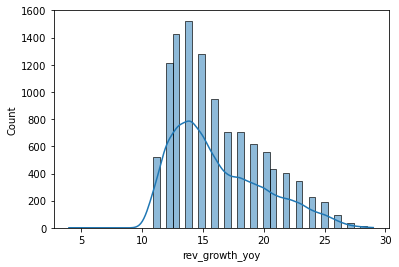

In [157]:
# Distribution of variable after treating outlier
sns.histplot(x = df['rev_growth_yoy'],kde=True)

In [158]:
df_o['rev_growth_yoy_new'] = np.where(df['rev_growth_yoy']>ur,ur,df['rev_growth_yoy']) 

In [159]:
df_o['rev_growth_yoy_new'] = np.where(df['rev_growth_yoy']<10,10,df['rev_growth_yoy']) 

<AxesSubplot:xlabel='rev_growth_yoy_new', ylabel='Count'>

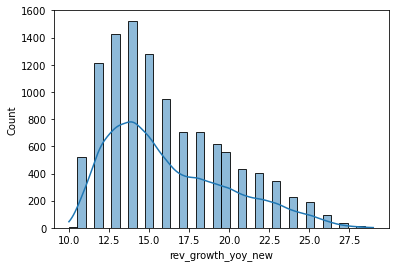

In [160]:
# Distribution of variable after treating outlier
sns.histplot(x = df['rev_growth_yoy_new'],kde=True)

### There is no effect of outlier treatment on given distribution so, retaining the original feature without outlier treatment

In [161]:
lr,ur = treat_outliers(df['cashback'])
df['cashback'].quantile(0.50)

165.24

<AxesSubplot:xlabel='cashback', ylabel='Count'>

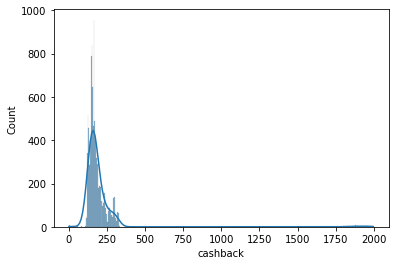

In [162]:
# Distribution of variable before treating outlier
sns.histplot(x = df['cashback'],kde=True)

In [163]:
d1 = df[df['cashback']>1800]
d1['cashback']

31       1974.0
119      1955.0
191      1813.0
226      1862.0
276      1982.0
          ...  
10636    1807.0
10706    1929.0
10893    1835.0
10997    1882.0
11105    1878.0
Name: cashback, Length: 107, dtype: float64

<AxesSubplot:xlabel='cashback'>

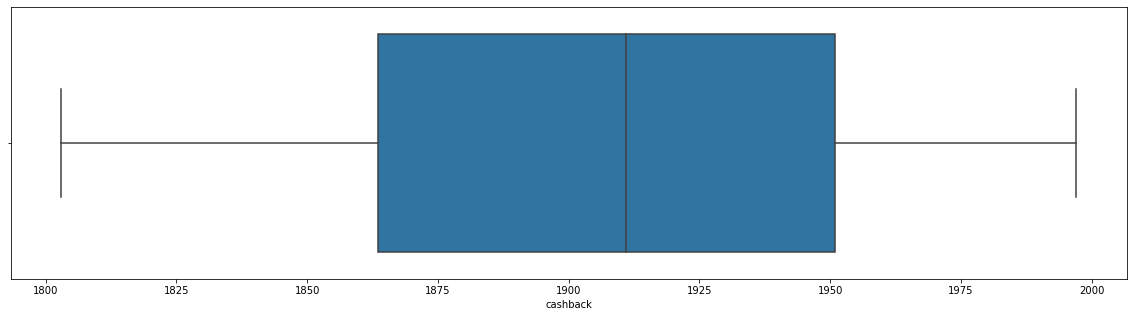

In [164]:
plt.figure(figsize=(20,5))
sns.boxplot(x=d1['cashback'])

<AxesSubplot:xlabel='cashback', ylabel='Count'>

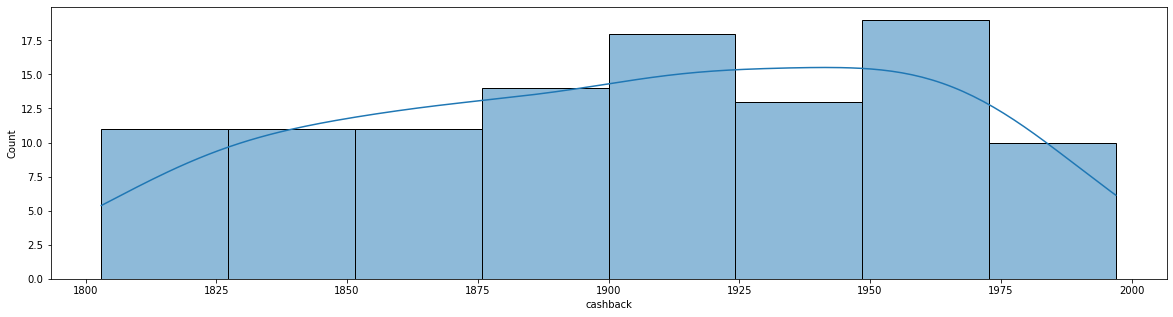

In [165]:
plt.figure(figsize=(20,5))
sns.histplot(x=d1['cashback'],kde=True)

In [166]:
df[df['cashback']<0]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_month_new,rev_growth_yoy_new


In [167]:
df['cashback'].quantile(0.50)

165.24

### The below outlier treatment is just for understanding purpose and not used further

In [168]:
df_o['cashback_new'] = np.where(df['cashback']>259,ur,df['cashback']) 

In [169]:
df_o['cashback_new'] = np.where(df['cashback']<100,100,df['cashback']) 

<AxesSubplot:xlabel='cashback_new', ylabel='Count'>

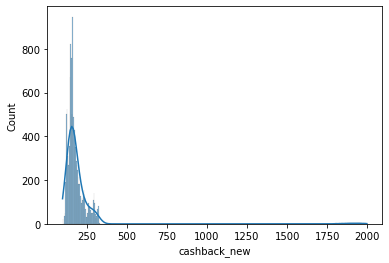

In [170]:
# Distribution of variable after treating ur, lr outlier
sns.histplot(x = df_o['cashback_new'],kde=True)

<AxesSubplot:xlabel='cashback', ylabel='Count'>

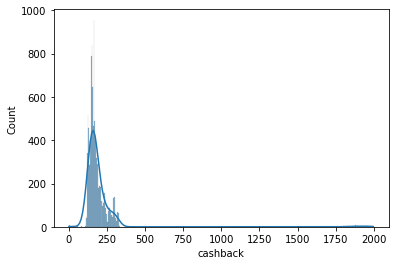

In [171]:
# Distribution of variable after treating ur outlier
sns.histplot(x = df['cashback'],kde=True)

<AxesSubplot:>

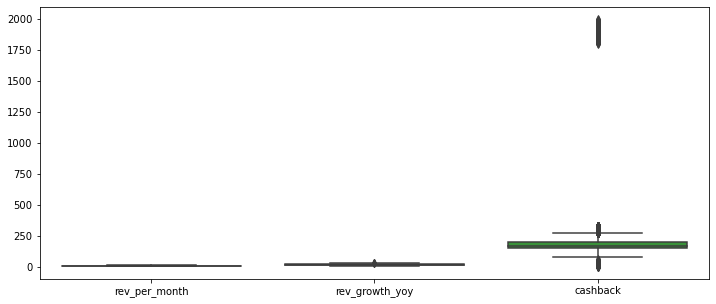

In [172]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df[['rev_per_month','rev_growth_yoy','cashback']])

### Changing cashback from continous to categorical data

In [173]:
Cashback_VLMH = []
for i in df['cashback']:
    m = df['cashback'].median()
    if i<=m:
        Cashback_VLMH.append('VeryLow')
    if i>m and i<=ur:
        Cashback_VLMH.append('Low')
    if i>ur and i<1800:
        Cashback_VLMH.append('Medium')
    if i>=1800:
        Cashback_VLMH.append('High')

In [174]:
df['cashback_VLMH'] = Cashback_VLMH

In [175]:
df['cashback_VLMH']

0        VeryLow
1        VeryLow
2        VeryLow
3        VeryLow
4        VeryLow
          ...   
11255    VeryLow
11256        Low
11257        Low
11258        Low
11259        Low
Name: cashback_VLMH, Length: 11260, dtype: object

In [176]:
df['cashback_VLMH'] = np.where(df['cashback_VLMH']=='VeryLow',0,df['cashback_VLMH'])

In [177]:
df['cashback_VLMH'] = np.where(df['cashback_VLMH']=='Low',1,df['cashback_VLMH'])

In [178]:
df['cashback_VLMH'] = np.where(df['cashback_VLMH']=='Medium',2,df['cashback_VLMH'])

In [179]:
df['cashback_VLMH'] = np.where(df['cashback_VLMH']=='High',3,df['cashback_VLMH'])

In [180]:
df['cashback_VLMH'] = df['cashback_VLMH'].astype('int')

<AxesSubplot:xlabel='cashback_VLMH', ylabel='count'>

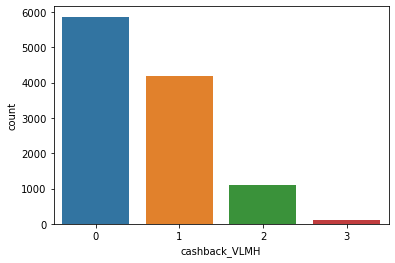

In [181]:
sns.countplot(x=df['cashback_VLMH'])

In [182]:
lr,ur = treat_outliers(df['CC_Contacted_LY'])
ur

38.0

<AxesSubplot:xlabel='CC_Contacted_LY'>

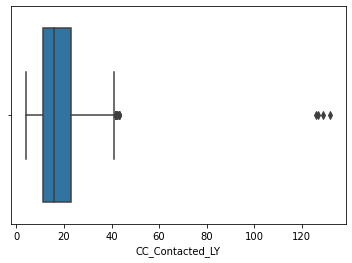

In [183]:
sns.boxplot(x=df['CC_Contacted_LY'])

In [184]:
df['CC_Contacted_LY'] = np.where(df['CC_Contacted_LY']>43,43,df['CC_Contacted_LY'])

<AxesSubplot:xlabel='CC_Contacted_LY'>

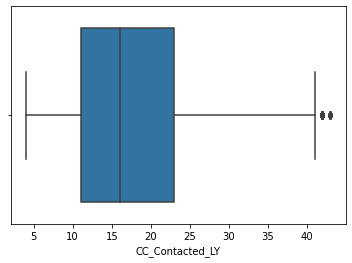

In [185]:
sns.boxplot(x=df['CC_Contacted_LY'])

<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='Count'>

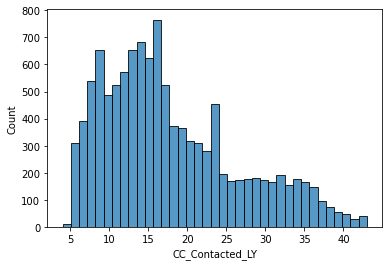

In [186]:
sns.histplot(x=df['CC_Contacted_LY'])

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [188]:
df = df.drop('rev_per_month_new',axis=1)

In [189]:
df = df.drop('rev_growth_yoy_new',axis=1)

In [190]:
df = df.drop('cashback_new',axis=1)

In [191]:
df = df.drop('cashback',axis=1)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [193]:
#### Changing data types of variables
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [194]:
df['account_segment'].value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [195]:
df = df.join(pd.get_dummies(df[['Payment','account_segment','Marital_Status']].astype(str), prefix='', prefix_sep=''))

In [196]:
df = df.join(pd.get_dummies(df[['Login_device']].astype(str), prefix='', prefix_sep=''))

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  uint8  
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [198]:
df.drop('Payment',axis=1,inplace=True)

In [199]:
df.drop('account_segment',axis=1,inplace=True)

In [200]:
df.drop('Marital_Status',axis=1,inplace=True)

In [201]:
df.drop('Login_device',axis=1,inplace=True)

In [202]:
# df.drop(['rev_per_month_new','rev_growth_yoy_new','cashback_new','cashback_VLMH'],axis=1,inplace=True)

In [203]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float')

In [204]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('int')

In [205]:
df.columns = df.columns.str.replace(' ', '_')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Gender                   11260 non-null  uint8  
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  float64
 7   CC_Agent_Score           11260 non-null  float64
 8   rev_per_month            11260 non-null  float64
 9   Complain_ly              11260 non-null  float64
 10  rev_growth_yoy           11260 non-null  float64
 11  coupon_used_for_payment  11260 non-null  int32  
 12  Day_Since_CC_connect     11260 non-null  float64
 13  cashback_VLMH            11260 non-null  int32  
 14  Cash_on_Delivery      

### e) Variable transformation (if applicable)

In [207]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,Regular,Regular_Plus,Super,Super_Plus,Divorced,Married,Single,Computer,Mobile,Other
0,1,4.0,3.0,6.0,0,3.0,3.0,2.0,9.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,1,0.0,1.0,8.0,1,3.0,4.0,3.0,7.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,1,0.0,1.0,30.0,1,2.0,4.0,3.0,6.0,1.0,...,0,1,0,0,0,0,1,0,1,0
3,1,0.0,3.0,15.0,1,2.0,4.0,5.0,8.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,1,0.0,1.0,12.0,1,2.0,3.0,5.0,3.0,0.0,...,0,1,0,0,0,0,1,0,1,0


In [208]:
df1 = df.copy()

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
sc = StandardScaler()
data_sc = sc.fit_transform(df)

In [211]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,Regular,Regular_Plus,Super,Super_Plus,Divorced,Married,Single,Computer,Mobile,Other
0,1,4.0,3.0,6.0,0,3.0,3.0,2.0,9.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,1,0.0,1.0,8.0,1,3.0,4.0,3.0,7.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,1,0.0,1.0,30.0,1,2.0,4.0,3.0,6.0,1.0,...,0,1,0,0,0,0,1,0,1,0
3,1,0.0,3.0,15.0,1,2.0,4.0,5.0,8.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,1,0.0,1.0,12.0,1,2.0,3.0,5.0,3.0,0.0,...,0,1,0,0,0,0,1,0,1,0


In [212]:
rev_growth_yoy = []
for i in df['rev_growth_yoy']:
    x = (i-df['rev_growth_yoy'].mean())/(df['rev_growth_yoy'].std())
    rev_growth_yoy.append(x)

In [213]:
y = pd.DataFrame({'rev_growth_yoy':rev_growth_yoy})

In [214]:
y.head()

,rev_growth_yoy
0,-1.381016
1,-0.318042
2,-0.583786
3,1.807904
4,-1.381016


In [215]:
df['rev_growth_yoy'] = y

<AxesSubplot:xlabel='rev_growth_yoy', ylabel='Count'>

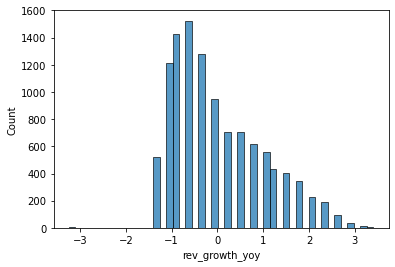

In [216]:
sns.histplot(df['rev_growth_yoy'])

### 4. Business insights from EDA
### a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

In [217]:
df['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [218]:
for i in df.columns:
    print(df[i].value_counts())

0    9364
1    1896
Name: Churn, dtype: int64
1.0     1351
0.0     1231
9.0      598
8.0      519
7.0      450
10.0     423
3.0      410
5.0      403
4.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
28.0     137
30.0     137
27.0     131
99.0     131
26.0     122
32.0     116
25.0     114
29.0     114
31.0      96
50.0       2
60.0       2
51.0       2
61.0       2
Name: Tenure, dtype: int64
1.0    7375
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
16.0    765
14.0    682
9.0     655
13.0    655
15.0    623
12.0    571
8.0     538
17.0    525
11.0    524
10.0    489
7.0     391
18.0    374
19.0    364
20.0    319
6.0     311
21.0    310
22.0    282
23.0    241
24.0    214
25.0    197
32.0    192
29.0    181
34.0    178
28.0    178
30.0    175
27.0    174
26.0    169
31.0    165
35.0    165
33.0    155
36.0   

In [219]:
from imblearn.over_sampling import SMOTE

In [220]:
smote = SMOTE(random_state=2)

In [221]:
x_train = df.drop('Churn',axis=1)
y_train = df.pop('Churn')

In [222]:
xtrain_res,ytrain_res = smote.fit_resample(x_train, y_train)

In [223]:
ytrain_res.value_counts()

1    9364
0    9364
Name: Churn, dtype: int64

### SMOTE technique not preferred for further analysis as the target is categorical and smote cannot interpolate between two categories 0,1 to create more data points

In [224]:
# To import libraries for heirarchial clustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [225]:
# To link the data using ward linkage method
wardlink = linkage(df,method='ward',metric='euclidean')

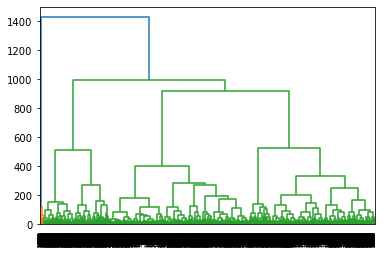

In [226]:
# To visualize dendrogram 
dend = dendrogram(wardlink)

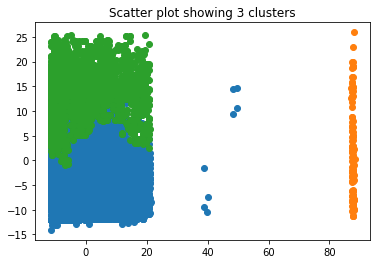

In [227]:
# To see number of clusters formed using fcluster method
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
# To perform decomposition
pca = PCA(7)

# To fit scaled data in pca
df_pca= pca.fit_transform(df)

# To perform Aglomerative clusering using 3 clusters
Aggcl = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label = Aggcl.fit_predict(df_pca)

# To consider unique labels
u_label = np.unique(label)
for i in u_label:
    plt.scatter(df_pca[label==i,0],df_pca[label==i,1])
    
plt.title("Scatter plot showing 3 clusters")
plt.show()

In [228]:
# To perform Aglomerative clusering using 3 clusters
Aggcl = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label = Aggcl.fit_predict(df)

In [229]:
l = pd.DataFrame({'cluster':label})

In [236]:
type(df)

pandas.core.frame.DataFrame

In [237]:
df_1 = df.copy()
df_1 = pd.concat([df,l],axis=1)

In [238]:
df_1.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Regular_Plus,Super,Super_Plus,Divorced,Married,Single,Computer,Mobile,Other,cluster
0,4.0,3.0,6.0,0,3.0,3.0,2.0,9.0,1.0,-1.381016,...,0,1,0,0,0,1,0,1,0,0
1,0.0,1.0,8.0,1,3.0,4.0,3.0,7.0,1.0,-0.318042,...,1,0,0,0,0,1,0,1,0,0
2,0.0,1.0,30.0,1,2.0,4.0,3.0,6.0,1.0,-0.583786,...,1,0,0,0,0,1,0,1,0,2
3,0.0,3.0,15.0,1,2.0,4.0,5.0,8.0,0.0,1.807904,...,0,1,0,0,0,1,0,1,0,0
4,0.0,1.0,12.0,1,2.0,3.0,5.0,3.0,0.0,-1.381016,...,1,0,0,0,0,1,0,1,0,0


In [241]:
df_2 = df_1.groupby('cluster').nunique()

In [243]:
df_2[['Tenure','Day_Since_CC_connect','Complain_ly','CC_Agent_Score','rev_per_month']]

,Tenure,Day_Since_CC_connect,Complain_ly,CC_Agent_Score,rev_per_month
cluster,,,,,
0,37,24,2,5,15
1,1,16,2,5,14
2,33,17,2,5,15


### 5. Model building and interpretation.

### a. Build various models

### Logistic Regression

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
from sklearn.metrics import classification_report, confusion_matrix

In [236]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [237]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.30,random_state=10)

In [238]:
grid={
"penalty":["l1","l2","elasticnet"]
}
lgm =LogisticRegression(fit_intercept=True)
lgm = GridSearchCV(lgm,grid,cv=10)

In [239]:
model_lg = lgm.fit(X_train,Y_train)

In [240]:
model_lg = model_lg.best_estimator_

In [241]:
model_lg.score(X_train,Y_train)

0.8850545546815529

In [242]:
model_lg.score(X_test,Y_test)

0.8750740082889283

In [243]:
lg_train_predict = model_lg.predict(X_train)

In [244]:
lg_train_prob = model_lg.predict_proba(X_train)

In [245]:
model_lg.feature_names_in_

array(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Gender',
       'Service_Score', 'Account_user_count', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback_VLMH',
       'Cash_on_Delivery', 'Credit_Card', 'Debit_Card', 'E_wallet', 'UPI',
       'HNI', 'Regular', 'Regular_Plus', 'Super', 'Super_Plus',
       'Divorced', 'Married', 'Single', 'Computer', 'Mobile', 'Other'],
      dtype=object)

In [246]:
d1 = pd.DataFrame({'feature':model_lg.feature_names_in_})
x= np.array(model_lg.coef_)[0]
d2 = pd.DataFrame({'Coef':x})
imp_feat =pd.concat([d1,d2],axis=1)

In [247]:
imp_feat.sort_values(by='Coef',ascending=False).head(10)

,feature,Coef
8,Complain_ly,1.608768
1,City_Tier,0.362084
3,Gender,0.356390
6,CC_Agent_Score,0.278746
19,Regular,0.270070
5,Account_user_count,0.269369
10,coupon_used_for_payment,0.130018
7,rev_per_month,0.081653
2,CC_Contacted_LY,0.026128
4,Service_Score,-0.014666


In [248]:
imp_feat.sort_values(by='Coef',ascending=True).head(10)

,feature,Coef
28,Other,-1.490024
21,Super,-1.285558
24,Married,-1.178931
23,Divorced,-0.927569
22,Super_Plus,-0.846792
14,Credit_Card,-0.788632
17,UPI,-0.616437
27,Mobile,-0.583628
15,Debit_Card,-0.574909
18,HNI,-0.270124


Text(33.0, 0.5, 'Actual')

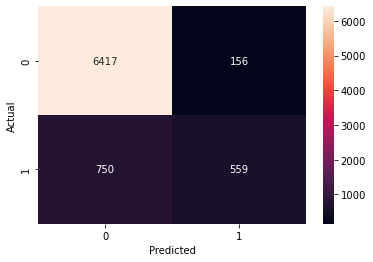

In [249]:
sns.heatmap(confusion_matrix(Y_train,lg_train_predict),annot=True,fmt='0.5g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [250]:
print(classification_report(Y_train,lg_train_predict,digits=3))

              precision    recall  f1-score   support

           0      0.895     0.976     0.934      6573
           1      0.782     0.427     0.552      1309

    accuracy                          0.885      7882
   macro avg      0.839     0.702     0.743      7882
weighted avg      0.876     0.885     0.871      7882



AUC:  0.8639992738309382


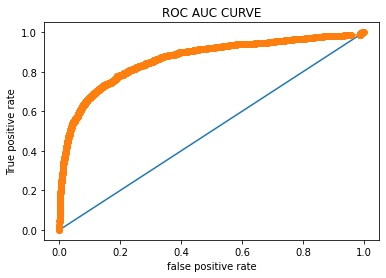

In [251]:
# To determine AUC score, roc_auc_curve for training set
probs = lg_train_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC: ",AUC)

fpr_lgtrain,tpr_lgtrain, thresholds = roc_curve(Y_train,probs)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("ROC AUC CURVE")
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_lgtrain,tpr_lgtrain,marker='o')

### Stats model using logit 

In [252]:
import statsmodels.formula.api as sm

In [253]:
from sklearn import metrics

In [254]:
xtrain = pd.concat([X_train,Y_train],axis=1)

In [255]:
xtest = pd.concat([X_test,Y_test],axis=1)

In [256]:
formula  = 'Churn~Other+Super+Married+Divorced+Super_Plus+Credit_Card+cashback_VLMH+Complain_ly'
model_stats = sm.logit(formula,data=xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.381562
         Iterations 7


In [257]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7873
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.1513
Time:                        20:30:53   Log-Likelihood:                -3007.5
converged:                       True   LL-Null:                       -3543.8
Covariance Type:            nonrobust   LLR p-value:                3.066e-226
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8420      0.065    -12.871      0.000      -0.970      -0.714
Other            -0.0393      0.158     -0.248      0.804      -0.349       0.271
Super            -0.9687      0.077    -12.611      0.000      -1.119      -0.818
Married          -1.0380      0.071    -14.600      0.000      -1.177      -0.899
Divorced         -0.7543      0.102     -7.407      0.000      -0.954      -0.555
Super_Plus       -1.3783      0.216     -6.387      0.000      -1.801      -0.955
Credit_Card      -0.3999      0.074     -5.409      0.000      -0.545      -0.255
cashback_VLMH    -0.4427      0.056     -7.923      0.000      -0.552      -0.333
Complain_ly       1.4221      0.067     21.261      0.000       1.291       1.553
=================================================================================
"""

In [258]:
train_predict = model_stats.predict(xtrain)

In [259]:
train_predict_class = []
for i in train_predict:
    if i>0.40:
        a=1
    if i<0.40:
        a=0
    train_predict_class.append(a)

Text(33.0, 0.5, 'Actual')

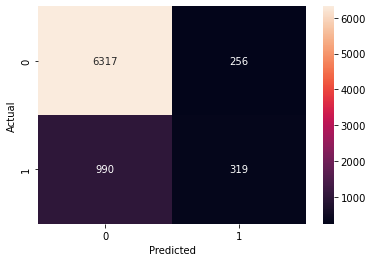

In [260]:
sns.heatmap(metrics.confusion_matrix(xtrain['Churn'],train_predict_class),annot=True,fmt='0.6g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [261]:
print(metrics.classification_report(xtrain['Churn'],train_predict_class,digits=3))

              precision    recall  f1-score   support

           0      0.865     0.961     0.910      6573
           1      0.555     0.244     0.339      1309

    accuracy                          0.842      7882
   macro avg      0.710     0.602     0.624      7882
weighted avg      0.813     0.842     0.815      7882



### Decision Tree Classifier

In [262]:
from sklearn.tree import DecisionTreeClassifier

In [263]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2',None],
              'max_depth' : [5, 6, 7, 8, 9,10],
              'criterion' :['gini','entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=10,criterion='entropy')
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, verbose=True)
model_dt = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [264]:
model_dt.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=True)>

In [265]:
model_dt = model_dt.best_estimator_

In [266]:
model_dt.score(X_train,Y_train)

0.96422227860949

In [267]:
model_dt.score(X_test,Y_test)

0.9626998223801065

In [268]:
train_predict = model_dt.predict(X_train)

In [269]:
train_predict_prob = model_dt.predict_proba(X_train)

Text(33.0, 0.5, 'Actual')

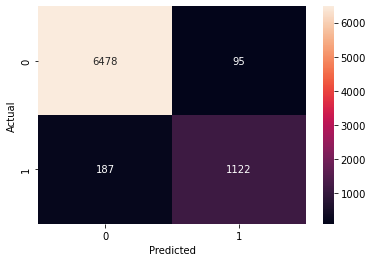

In [270]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [271]:
print(metrics.classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6573
           1       0.92      0.86      0.89      1309

    accuracy                           0.96      7882
   macro avg       0.95      0.92      0.93      7882
weighted avg       0.96      0.96      0.96      7882



AUC SCORE: 0.9826446988903025


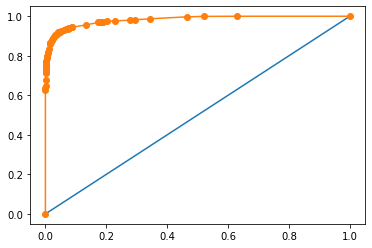

In [272]:
# Roc_auc_score, roc_curve
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr_dttrain,tpr_dttrain, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_dttrain,tpr_dttrain,marker='o')


### Linear Discriminant Analysis

In [273]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [274]:
ld = LinearDiscriminantAnalysis()
model_ld = ld.fit(X_train,Y_train)

In [275]:
model_ld.score(X_train,Y_train)

0.8733823902562802

In [276]:
train_predict = model_ld.predict(X_train)

Text(33.0, 0.5, 'Actual')

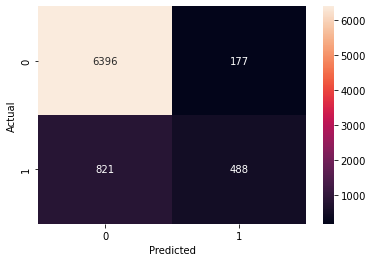

In [277]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [278]:
print(metrics.classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6573
           1       0.73      0.37      0.49      1309

    accuracy                           0.87      7882
   macro avg       0.81      0.67      0.71      7882
weighted avg       0.86      0.87      0.86      7882



AUC SCORE: 0.8397744226938524


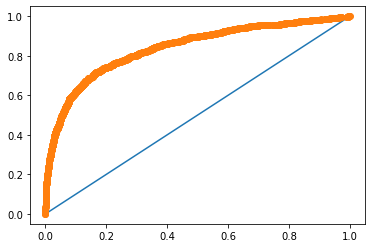

In [279]:
# Roc_auc_score, roc_curve
train_predict_prob = model_ld.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr_ldtrain,tpr_ldtrain, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_ldtrain,tpr_ldtrain,marker='o')


### Support Vector Classifier

In [280]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [281]:
svc = SVC(kernel='rbf',probability=True)
model_svc = svc.fit(X_train,Y_train)

In [282]:
model_svc.score(X_train,Y_train)

0.890636894189292

In [283]:
train_predict = model_svc.predict(X_train)

Text(33.0, 0.5, 'Actual')

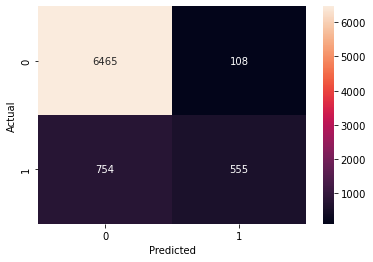

In [284]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [285]:
print(metrics.classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6573
           1       0.84      0.42      0.56      1309

    accuracy                           0.89      7882
   macro avg       0.87      0.70      0.75      7882
weighted avg       0.89      0.89      0.88      7882



AUC SCORE: 0.8891414829074238


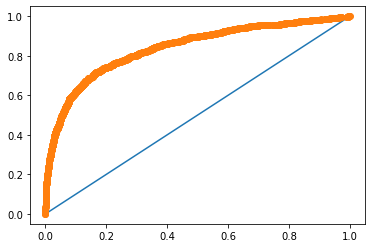

In [286]:
# Roc_auc_score, roc_curve
train_predict_prob = model_svc.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr_svctrain,tpr_svctrain, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_ldtrain,tpr_ldtrain,marker='o')

### Naive Bayes

In [287]:
from sklearn.naive_bayes import GaussianNB

In [288]:
nb = GaussianNB()
model_nb = nb.fit(X_train,Y_train)

In [289]:
model_nb.score(X_train,Y_train)

0.7692210098959655

In [290]:
train_predict = model_nb.predict(X_train)

Text(33.0, 0.5, 'Actual')

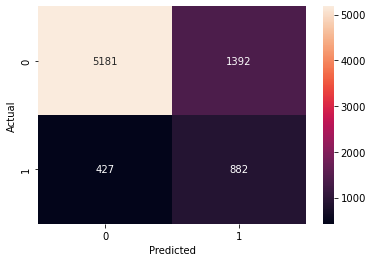

In [291]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [292]:
print(metrics.classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6573
           1       0.39      0.67      0.49      1309

    accuracy                           0.77      7882
   macro avg       0.66      0.73      0.67      7882
weighted avg       0.83      0.77      0.79      7882



AUC SCORE: 0.7885827581105053


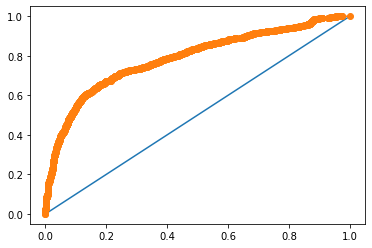

In [293]:
# Roc_auc_score, roc_curve
train_predict_prob = model_nb.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr_nbtrain,tpr_nbtrain, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_nbtrain,tpr_nbtrain,marker='o')

### K Nearest Neighbours

In [294]:
from sklearn.neighbors import KNeighborsClassifier   

In [295]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean' )  
model_knn = knn.fit(X_train, Y_train) 

In [296]:
model_knn.score(X_train,Y_train)

0.9489977163156559

In [297]:
train_predict = model_knn.predict(X_train)

Text(33.0, 0.5, 'Actual')

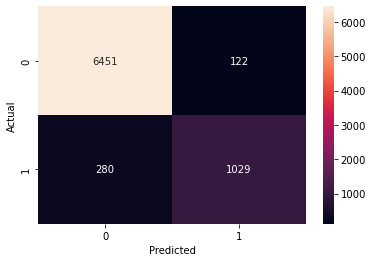

In [298]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [299]:
print(metrics.classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6573
           1       0.89      0.79      0.84      1309

    accuracy                           0.95      7882
   macro avg       0.93      0.88      0.90      7882
weighted avg       0.95      0.95      0.95      7882



AUC SCORE: 0.9819015029770258


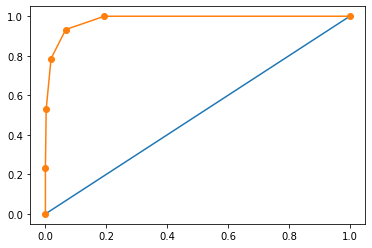

In [300]:
# Roc_auc_score, roc_curve
train_predict_prob = model_knn.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr_knntrain,tpr_knntrain, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_knntrain,tpr_knntrain,marker='o')

### 6. Test your predictive model against the test set using various appropriate performance metrics

### Logistic Regression

In [301]:
model_lg.score(X_train,Y_train)

0.8850545546815529

In [302]:
model_lg.score(X_test,Y_test)

0.8750740082889283

In [303]:
test_predict = model_lg.predict(X_test)

Text(33.0, 0.5, 'Actual')

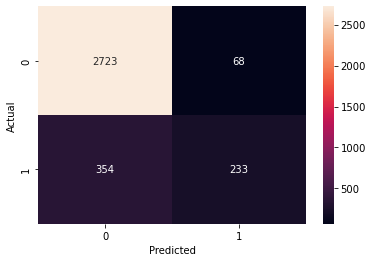

In [304]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [305]:
print(metrics.classification_report(Y_test,test_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2791
           1       0.77      0.40      0.52       587

    accuracy                           0.88      3378
   macro avg       0.83      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378



AUC SCORE: 0.8573194320757217


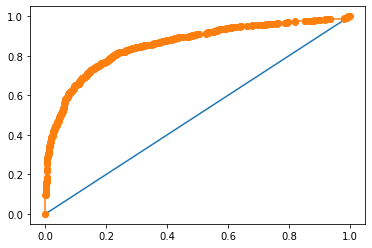

In [306]:
# Roc_auc_score, roc_curve
test_predict_prob = model_lg.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr_lg,tpr_lg, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_lg,tpr_lg,marker='o')

### Stats Model against test set

In [307]:
test_predict = model_stats.predict(X_test)

In [308]:
test_predict_class = []
for i in test_predict:
    if i>0.40:
        a=1
    if i<0.40:
        a=0
    test_predict_class.append(a)

Text(33.0, 0.5, 'Actual')

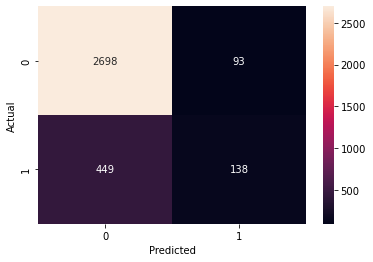

In [309]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict_class),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [310]:
print(metrics.classification_report(Y_test,test_predict_class))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2791
           1       0.60      0.24      0.34       587

    accuracy                           0.84      3378
   macro avg       0.73      0.60      0.62      3378
weighted avg       0.81      0.84      0.81      3378



### Decision Tree Classifier against test set

In [311]:
model_dt.score(X_train,Y_train)

0.96422227860949

In [312]:
model_dt.score(X_test,Y_test)

0.9626998223801065

In [313]:
train_predict  = model_dt.predict(X_train)

In [314]:
test_predict  = model_dt.predict(X_test)

Text(33.0, 0.5, 'Actual')

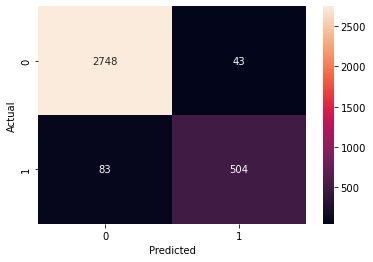

In [315]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [316]:
print(metrics.classification_report(Y_train,train_predict))
print("-------------------------------------------------------")
print(metrics.classification_report(Y_test,test_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6573
           1       0.92      0.86      0.89      1309

    accuracy                           0.96      7882
   macro avg       0.95      0.92      0.93      7882
weighted avg       0.96      0.96      0.96      7882

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2791
           1       0.92      0.86      0.89       587

    accuracy                           0.96      3378
   macro avg       0.95      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



AUC SCORE: 0.983993329740215


Text(0, 0.5, 'True positive rate')

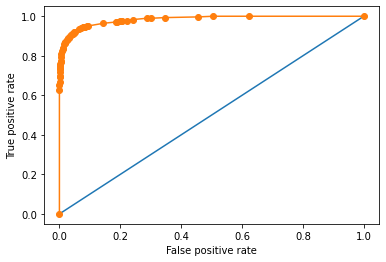

In [317]:
# Roc_auc_score, roc_curve
test_predict_prob = model_dt.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr_dt,tpr_dt, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_dt,tpr_dt,marker='o')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [318]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt,out_file='tree.dot')

In [319]:
d1 = pd.DataFrame({'feature':model_dt.feature_names_in_})
x= np.array(model_dt.feature_importances_)
d2 = pd.DataFrame({'Coef':x})
imp_feat =pd.concat([d1,d2],axis=1)

In [320]:
imp_feat.sort_values(by='Coef',ascending=False).head(5)

,feature,Coef
0,Tenure,0.374310
11,Day_Since_CC_connect,0.090538
8,Complain_ly,0.071092
6,CC_Agent_Score,0.058191
7,rev_per_month,0.054861


In [321]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
params = ['Married','Divorced','Super_Plus','Credit_Card','cashback_VLMH','Complain_ly','Tenure','Day_Since_CC_connect','CC_Agent_Score','rev_per_month']
feat = []
for i in params:
    feat.append(X_train[i])
    
df_feat = pd.DataFrame(feat).T

VIF = pd.DataFrame()
VIF['Features'] = params
VIF['VIF'] = [vif(df_feat.values,i) for i in range(df_feat.shape[1])]

In [322]:
VIF.sort_values('VIF',ascending=False)

,Features,VIF
8,CC_Agent_Score,3.947025
9,rev_per_month,3.106285
7,Day_Since_CC_connect,2.578878
0,Married,2.396768
4,cashback_VLMH,2.338735
6,Tenure,1.859976
3,Credit_Card,1.412385
1,Divorced,1.400644
2,Super_Plus,1.337863
5,Complain_ly,1.317474


### Linear Discriminant Analysis against test set

In [323]:
model_ld.score(X_train,Y_train)

0.8733823902562802

In [324]:
model_ld.score(X_test,Y_test)

0.8638247483718177

In [325]:
test_predict  = model_ld.predict(X_test)

Text(33.0, 0.5, 'Actual')

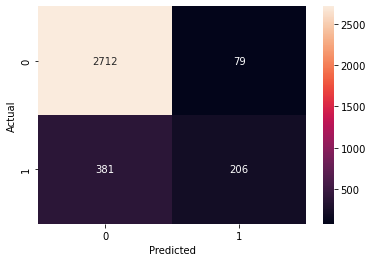

In [326]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [327]:
print(metrics.classification_report(Y_test,test_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2791
           1       0.72      0.35      0.47       587

    accuracy                           0.86      3378
   macro avg       0.80      0.66      0.70      3378
weighted avg       0.85      0.86      0.84      3378



AUC SCORE: 0.8338868485158855


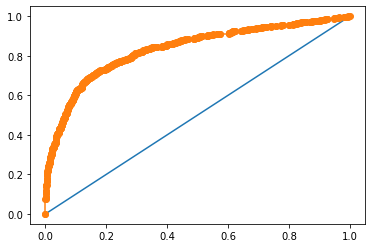

In [328]:
# Roc_auc_score, roc_curve
test_predict_prob = model_ld.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr_ld,tpr_ld, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_ld,tpr_ld,marker='o')

### Support Vector Machine against test set

In [329]:
model_svc.score(X_train,Y_train)

0.890636894189292

In [330]:
model_svc.score(X_test,Y_test)

0.8830669034931913

In [331]:
test_predict = model_svc.predict(X_test)

Text(33.0, 0.5, 'Actual')

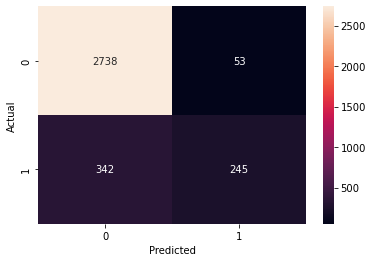

In [332]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [333]:
print(metrics.classification_report(Y_test,test_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2791
           1       0.82      0.42      0.55       587

    accuracy                           0.88      3378
   macro avg       0.86      0.70      0.74      3378
weighted avg       0.88      0.88      0.87      3378



AUC SCORE: 0.8711848805817188


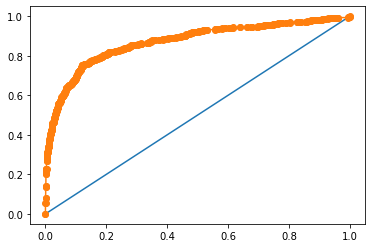

In [334]:
# Roc_auc_score, roc_curve
test_predict_prob = model_svc.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr_svc,tpr_svc, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_svc,tpr_svc,marker='o')

### Naive Bayes against test set

In [335]:
model_nb.score(X_train,Y_train)

0.7692210098959655

In [336]:
model_nb.score(X_test,Y_test)

0.7670219064535228

In [337]:
train_predict = model_nb.predict(X_train)

In [338]:
test_predict = model_nb.predict(X_test)

In [339]:
test_predict_class = []
for i in test_predict:
    if i>0.90:
        a=1
    if i<0.90:
        a=0
    test_predict_class.append(a)

Text(33.0, 0.5, 'Actual')

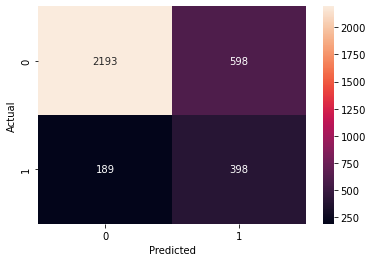

In [340]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict_class),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [341]:
print(metrics.classification_report(Y_train,train_predict))
print("-----------------------------------------------------")
print(metrics.classification_report(Y_test,test_predict_class))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6573
           1       0.39      0.67      0.49      1309

    accuracy                           0.77      7882
   macro avg       0.66      0.73      0.67      7882
weighted avg       0.83      0.77      0.79      7882

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2791
           1       0.40      0.68      0.50       587

    accuracy                           0.77      3378
   macro avg       0.66      0.73      0.68      3378
weighted avg       0.83      0.77      0.79      3378



AUC SCORE: 0.7806077822545943


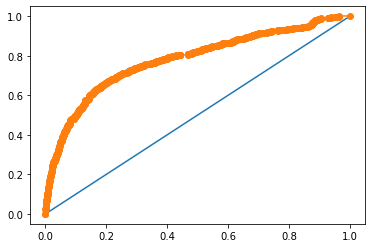

In [342]:
# Roc_auc_score, roc_curve
test_predict_prob = model_nb.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr_nb,tpr_nb, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_nb,tpr_nb,marker='o')

### KNN against test set

In [343]:
model_knn.score(X_train,Y_train)

0.9489977163156559

In [344]:
model_knn.score(X_test,Y_test)

0.9020130254588514

In [345]:
test_predict = model_knn.predict(X_test)

Text(33.0, 0.5, 'Actual')

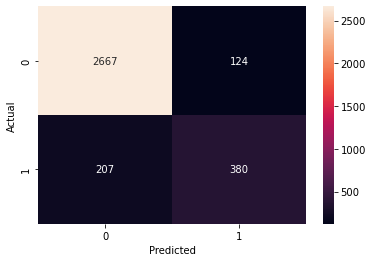

In [346]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [347]:
print(metrics.classification_report(Y_test,test_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2791
           1       0.75      0.65      0.70       587

    accuracy                           0.90      3378
   macro avg       0.84      0.80      0.82      3378
weighted avg       0.90      0.90      0.90      3378



AUC SCORE: 0.9256279462399524


Text(0, 0.5, 'tpr')

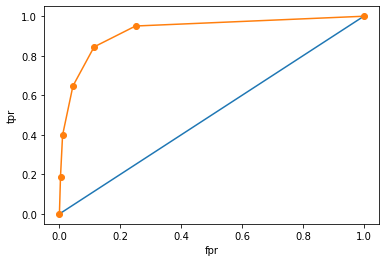

In [348]:
# Roc_auc_score, roc_curve
test_predict_prob = model_knn.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr_knn,tpr_knn, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr_knn,tpr_knn,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

In [349]:
### C). Interpretrations mentioned in Business report

### Model Tuning

### a.Ensemble modelling, wherever applicable

In [350]:
### Decision Tree has performed well out of all models, using Bagging, Boosting, Random forest for ensemble modelling.

In [351]:
from sklearn.ensemble import RandomForestClassifier

RF_model=DecisionTreeClassifier(random_state=20,max_depth=10)
model_rf = RF_model.fit(X_train, Y_train)

In [352]:
model_rf.score(X_train,Y_train)

0.9713270743466126

In [353]:
model_rf.score(X_test,Y_test)

0.9292480757844879

In [354]:
train_predict = model_rf.predict(X_train)

In [355]:
test_predict = model_rf.predict(X_test)

Text(33.0, 0.5, 'Actual')

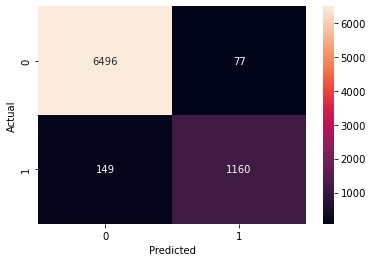

In [356]:
sns.heatmap(confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

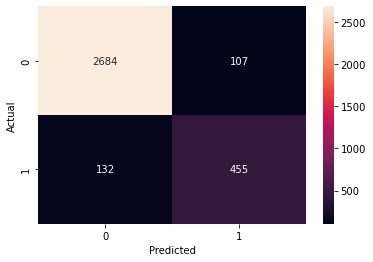

In [357]:
sns.heatmap(confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [358]:
print("                               Train data")
print(classification_report(Y_train,train_predict))
print("                               Test data")
print(classification_report(Y_test,test_predict))

                               Train data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6573
           1       0.94      0.89      0.91      1309

    accuracy                           0.97      7882
   macro avg       0.96      0.94      0.95      7882
weighted avg       0.97      0.97      0.97      7882

                               Test data
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2791
           1       0.81      0.78      0.79       587

    accuracy                           0.93      3378
   macro avg       0.88      0.87      0.87      3378
weighted avg       0.93      0.93      0.93      3378



AUC SCORE: 0.9901103630531504


Text(0, 0.5, 'tpr')

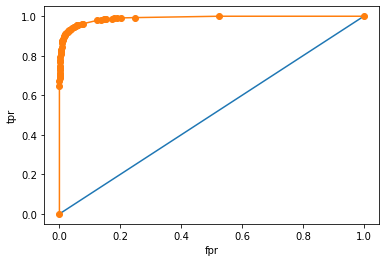

In [359]:
# Roc_auc_score, roc_curve
train_predict_prob = model_rf.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

AUC SCORE: 0.9177289865148197


Text(0, 0.5, 'tpr')

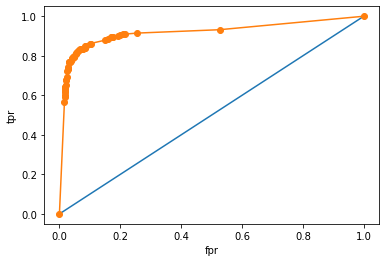

In [360]:
# Roc_auc_score, roc_curve
test_predict_prob = model_rf.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

### Bagging 

In [361]:
from sklearn.ensemble import BaggingClassifier

In [362]:
bg = DecisionTreeClassifier(min_samples_split=10,max_depth=10,min_samples_leaf=5,criterion='entropy')
Bagging_model=BaggingClassifier(base_estimator=bg,n_estimators=100,oob_score=True)
model_bagg = Bagging_model.fit(X_train, Y_train)

In [363]:
model_bagg.score(X_train, Y_train)

0.9670134483633596

In [364]:
model_bagg.score(X_test, Y_test)

0.9413854351687388

In [365]:
train_predict  = model_bagg.predict(X_train)

In [366]:
test_predict = model_bagg.predict(X_test)

Text(33.0, 0.5, 'Actual')

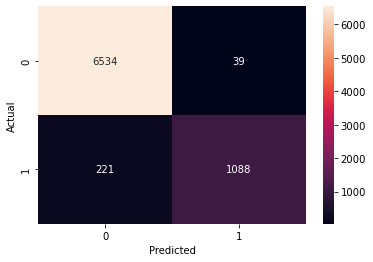

In [367]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

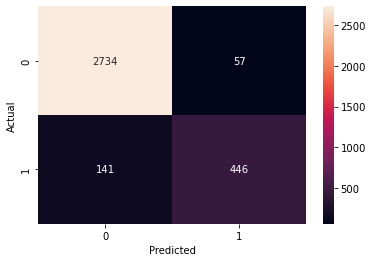

In [368]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [369]:
print("                               Train data")
print(metrics.classification_report(Y_train,train_predict))
print("                               Test data")
print(metrics.classification_report(Y_test,test_predict))

                               Train data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6573
           1       0.97      0.83      0.89      1309

    accuracy                           0.97      7882
   macro avg       0.97      0.91      0.94      7882
weighted avg       0.97      0.97      0.97      7882

                               Test data
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2791
           1       0.89      0.76      0.82       587

    accuracy                           0.94      3378
   macro avg       0.92      0.87      0.89      3378
weighted avg       0.94      0.94      0.94      3378



AUC SCORE: 0.9905172641231921


Text(0, 0.5, 'tpr')

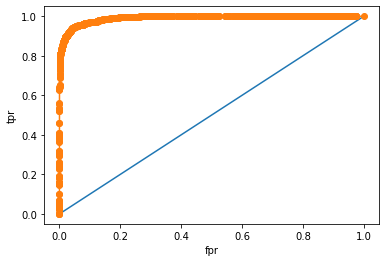

In [370]:
# Roc_auc_score, roc_curve
train_predict_prob = model_bagg.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

AUC SCORE: 0.9663636524555382


Text(0, 0.5, 'tpr')

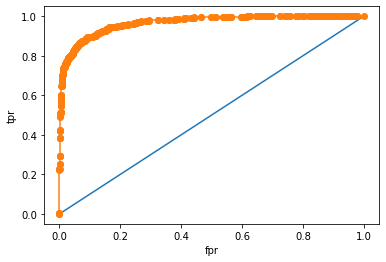

In [371]:
# Roc_auc_score, roc_curve
test_predict_prob = model_bagg.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

### Gradient Boosting

In [372]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1,criterion='mse',n_estimators=500)
model_gb = gbcl.fit(X_train, Y_train)

In [373]:
model_gb.score(X_train,Y_train)

0.9554681552905354

In [374]:
model_gb.score(X_test,Y_test)

0.9256956779159266

In [375]:
train_predict  = model_gb.predict(X_train)

In [376]:
test_predict  = model_gb.predict(X_test)

Text(33.0, 0.5, 'Actual')

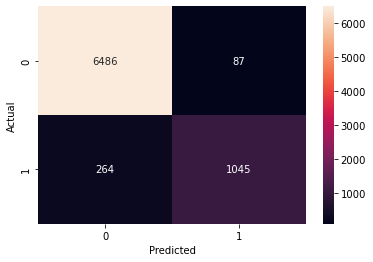

In [377]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

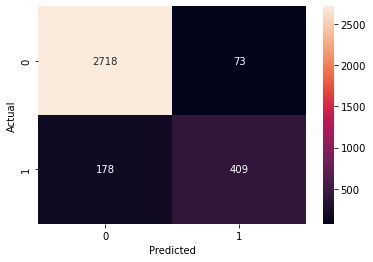

In [378]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [379]:
print("                               Train data")
print(metrics.classification_report(Y_train,train_predict))
print("                               Test data")
print(metrics.classification_report(Y_test,test_predict))

                               Train data
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6573
           1       0.92      0.80      0.86      1309

    accuracy                           0.96      7882
   macro avg       0.94      0.89      0.91      7882
weighted avg       0.95      0.96      0.95      7882

                               Test data
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2791
           1       0.85      0.70      0.77       587

    accuracy                           0.93      3378
   macro avg       0.89      0.84      0.86      3378
weighted avg       0.92      0.93      0.92      3378



AUC SCORE: 0.9873475966047179


Text(0, 0.5, 'tpr')

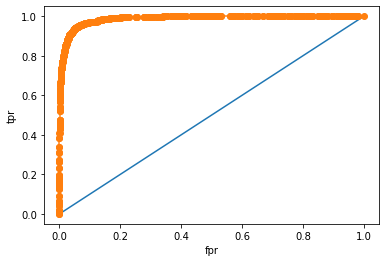

In [380]:
# Roc_auc_score, roc_curve
train_predict_prob = model_gb.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

AUC SCORE: 0.9642700405355008


Text(0, 0.5, 'tpr')

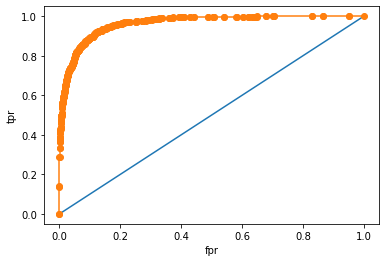

In [381]:
# Roc_auc_score, roc_curve
test_predict_prob = model_gb.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

### Ada Boosting Classifier

In [382]:
from sklearn.ensemble import AdaBoostClassifier
bg = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=5)
ADB_model = AdaBoostClassifier(base_estimator = bg)
model_adb = ADB_model.fit(X_train,Y_train)

In [383]:
model_adb.score(X_train,Y_train)

0.9982238010657194

In [384]:
model_adb.score(X_test,Y_test)

0.9600355239786856

In [385]:
train_predict  = model_adb.predict(X_train)

In [386]:
test_predict  = model_adb.predict(X_test)

Text(33.0, 0.5, 'Actual')

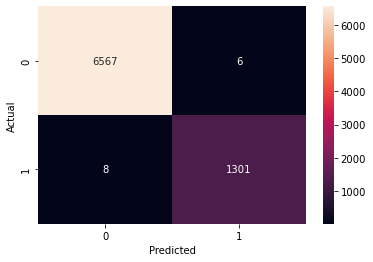

In [387]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

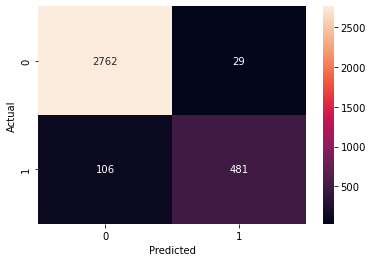

In [388]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [389]:
print("                               Train data")
print(metrics.classification_report(Y_train,train_predict))
print("                               Test data")
print(metrics.classification_report(Y_test,test_predict))

                               Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6573
           1       1.00      0.99      0.99      1309

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

                               Test data
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2791
           1       0.94      0.82      0.88       587

    accuracy                           0.96      3378
   macro avg       0.95      0.90      0.93      3378
weighted avg       0.96      0.96      0.96      3378



AUC SCORE: 0.9999765227031853


Text(0, 0.5, 'tpr')

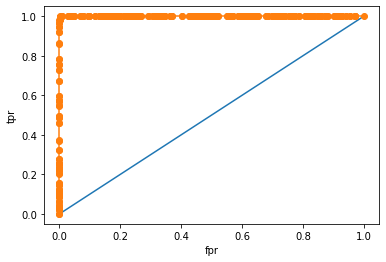

In [390]:
# Roc_auc_score, roc_curve
train_predict_prob = model_adb.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

AUC SCORE: 0.9879681404758665


Text(0, 0.5, 'tpr')

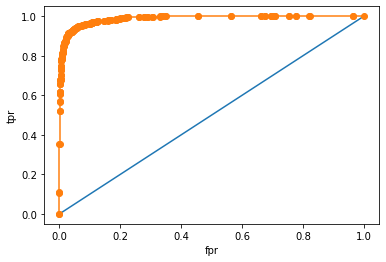

In [391]:
# Roc_auc_score, roc_curve
test_predict_prob = model_adb.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

### Bagging with KNN

In [392]:
kn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=1)  
Bagging_model= BaggingClassifier(base_estimator=kn)
model_bagg = Bagging_model.fit(X_train, Y_train)

In [393]:
model_bagg.score(X_train,Y_train)

0.9724689165186501

In [394]:
model_bagg.score(X_test,Y_test)

0.9440497335701599

In [395]:
train_predict  = model_bagg.predict(X_train)

In [396]:
test_predict  = model_bagg.predict(X_test)

Text(33.0, 0.5, 'Actual')

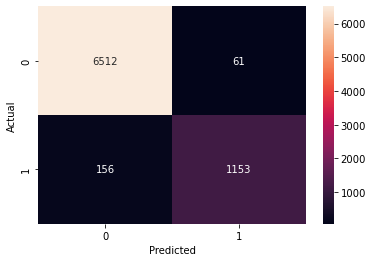

In [397]:
sns.heatmap(metrics.confusion_matrix(Y_train,train_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

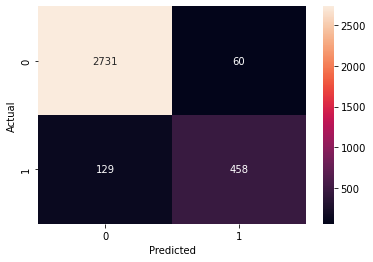

In [398]:
sns.heatmap(metrics.confusion_matrix(Y_test,test_predict),annot=True,fmt='0.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [399]:
print("                               Train data")
print(metrics.classification_report(Y_train,train_predict))
print("                               Test data")
print(metrics.classification_report(Y_test,test_predict))

                               Train data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6573
           1       0.95      0.88      0.91      1309

    accuracy                           0.97      7882
   macro avg       0.96      0.94      0.95      7882
weighted avg       0.97      0.97      0.97      7882

                               Test data
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2791
           1       0.88      0.78      0.83       587

    accuracy                           0.94      3378
   macro avg       0.92      0.88      0.90      3378
weighted avg       0.94      0.94      0.94      3378



AUC SCORE: 0.9949659213089825


Text(0, 0.5, 'tpr')

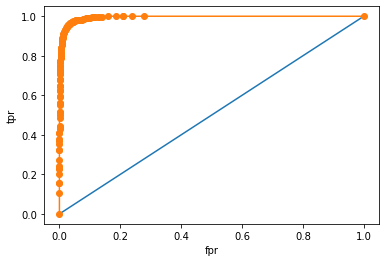

In [400]:
# Roc_auc_score, roc_curve
train_predict_prob = model_bagg.predict_proba(X_train)
probs = train_predict_prob[:,1]
AUC = roc_auc_score(Y_train,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

AUC SCORE: 0.9755923304220123


Text(0, 0.5, 'tpr')

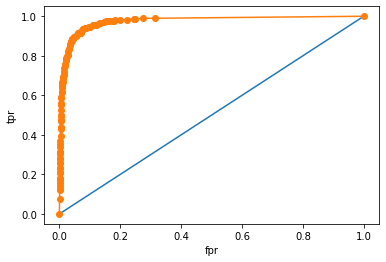

In [401]:
# Roc_auc_score, roc_curve
test_predict_prob = model_bagg.predict_proba(X_test)
probs = test_predict_prob[:,1]
AUC = roc_auc_score(Y_test,probs)
print("AUC SCORE:",AUC)

fpr,tpr, thresholds = roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='-')
plt.plot(fpr,tpr,marker='o')
plt.xlabel("fpr")
plt.ylabel("tpr")

In [402]:
train_p = pd.DataFrame({'Recall':[0.82,0.83,0.80,0.91,0.89],'f1-score':[0.89,0.90,0.86,0.93,0.92],'AUC-score':[0.99,0.99,0.98,0.99,0.99]},index=['Random_Forest','Bagg_DecTree','Gradient_Boost','AdaBoost_Rf','Bagging_knn'])

In [403]:
train_p

,Recall,f1-score,AUC-score
Random_Forest,0.82,0.89,0.99
Bagg_DecTree,0.83,0.90,0.99
Gradient_Boost,0.80,0.86,0.98
AdaBoost_Rf,0.91,0.93,0.99
Bagging_knn,0.89,0.92,0.99


Text(0, 0.5, 'Thresholds')

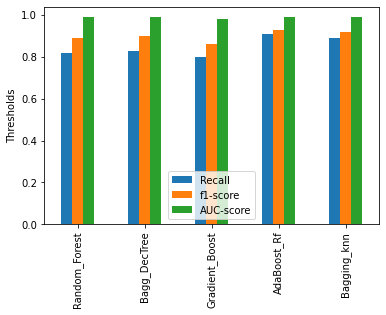

In [404]:
train_p.plot(kind='bar')
plt.ylabel('Thresholds')

In [405]:
test_p = pd.DataFrame({'Recall':[0.69,0.77,0.70,0.73,0.80],'f1-score':[0.80,0.83,0.77,0.81,0.84],'AUC-score':[0.97,0.96,0.96,0.97,0.97]},index=['Random_Forest','Bagg_DecTree','Gradient_Boost','AdaBoost_Rf','Bagging_knn'])

In [406]:
test_p

,Recall,f1-score,AUC-score
Random_Forest,0.69,0.80,0.97
Bagg_DecTree,0.77,0.83,0.96
Gradient_Boost,0.70,0.77,0.96
AdaBoost_Rf,0.73,0.81,0.97
Bagging_knn,0.80,0.84,0.97


Text(0, 0.5, 'Thresholds')

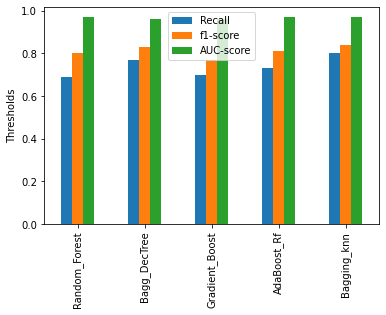

In [407]:
test_p.plot(kind='bar')
plt.ylabel('Thresholds')

### Insights from analysis

In [408]:
# Considering Decision Tree results for further 

In [409]:
test_predict = model_dt.predict(X_test)
test_predict[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [410]:
pd.DataFrame(test_predict).value_counts(normalize=True)

0    0.83807
1    0.16193
dtype: float64

In [411]:
Y_test.value_counts(normalize=True)

0    0.826229
1    0.173771
Name: Churn, dtype: float64

In [412]:
test_predict_proba = model_dt.predict_proba(X_test)

In [413]:
x = test_predict_proba[:]
test_prob_list1 = []
test_prob_list2 = []
for i in x:
    test_prob_list1.append(i[0])
    test_prob_list2.append(i[1])

list = test_prob_list1

Text(0, 0.5, 'Churn')

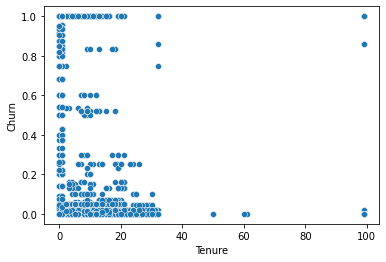

In [414]:
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['Tenure'])
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

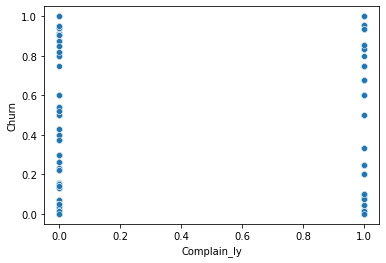

In [415]:
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['Complain_ly'])
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

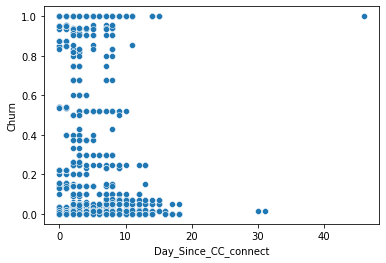

In [416]:
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['Day_Since_CC_connect'])
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

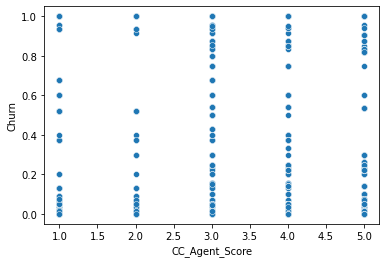

In [417]:
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['CC_Agent_Score'])
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

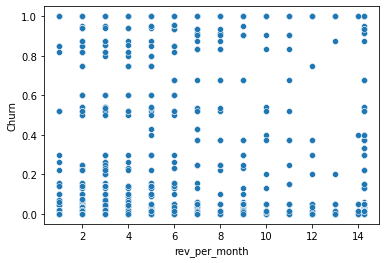

In [418]:
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['rev_per_month'])
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

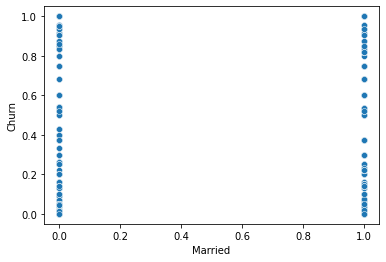

In [419]:
# Married	2.396768
# 4	cashback_VLMH	2.338735
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['Married'])
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

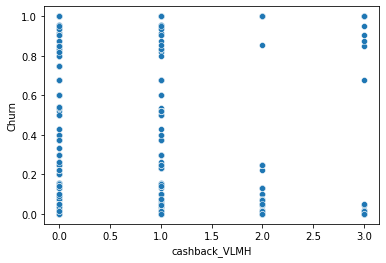

In [420]:
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['cashback_VLMH'])
plt.ylabel('Churn')

<AxesSubplot:xlabel='Tenure', ylabel='cashback_VLMH'>

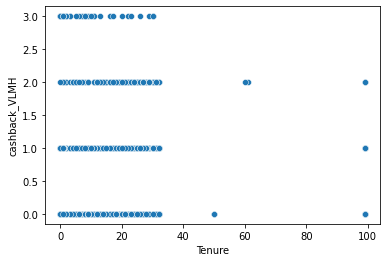

In [421]:
sns.scatterplot(x=X_test['Tenure'],y=X_test['cashback_VLMH'])
# plt.ylabel('Tenure')

<AxesSubplot:xlabel='Tenure', ylabel='Day_Since_CC_connect'>

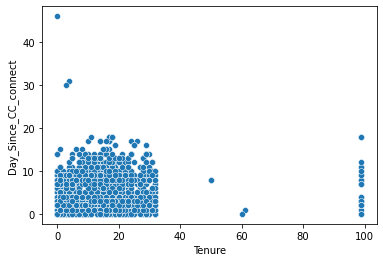

In [422]:
sns.scatterplot(x=X_test['Tenure'],y=X_test['Day_Since_CC_connect'])
# plt.ylabel('Tenure')

<AxesSubplot:xlabel='Day_Since_CC_connect', ylabel='cashback_VLMH'>

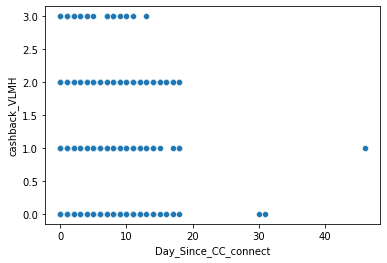

In [423]:
sns.scatterplot(x=X_test['Day_Since_CC_connect'],y=X_test['cashback_VLMH'])
# plt.ylabel('Tenure')

<AxesSubplot:xlabel='Tenure', ylabel='rev_per_month'>

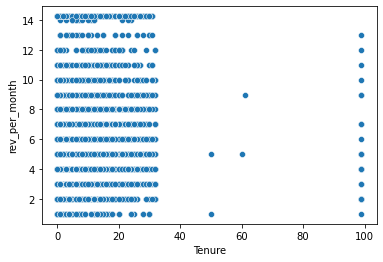

In [424]:
sns.scatterplot(x=X_test['Tenure'],y=X_test['rev_per_month'])
# plt.ylabel('Tenure')

Text(0, 0.5, 'Churn')

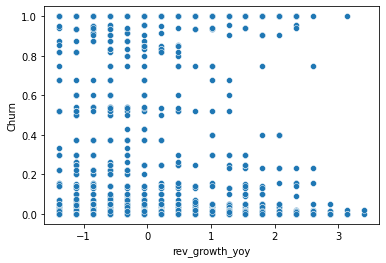

In [425]:
sns.scatterplot(y=test_predict_proba[:,1],x=X_test['rev_growth_yoy'])
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

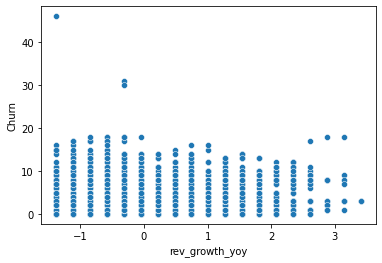

In [426]:
sns.scatterplot(y=X_test['Day_Since_CC_connect'],x=X_test['rev_growth_yoy'])
plt.ylabel('Churn')

In [427]:
train_params = pd.DataFrame({'Recall':[0.42,0.86,0.37,0.42,0.67,0.79],'f1-score':[0.55,0.89,0.49,0.56,0.49,0.84],'AUC-score':[0.86,0.98,0.84,0.89,0.78,0.95]},index=['Log_Reg','Decision_Tree','LDA','SVC','Naive_Bayes','KNN'])

In [428]:
train_params

,Recall,f1-score,AUC-score
Log_Reg,0.42,0.55,0.86
Decision_Tree,0.86,0.89,0.98
LDA,0.37,0.49,0.84
SVC,0.42,0.56,0.89
Naive_Bayes,0.67,0.49,0.78
KNN,0.79,0.84,0.95


In [429]:
test_params = pd.DataFrame({'Recall':[0.40,0.86,0.35,0.42,0.68,0.65],'f1-score':[0.52,0.89,0.47,0.55,0.50,0.70],'AUC-score':[0.85,0.98,0.83,0.87,0.78,0.92]},index=['Log_Reg','Decision_Tree','LDA','SVC','Naive_Bayes','KNN'])

Text(0, 0.5, 'Thresholds')

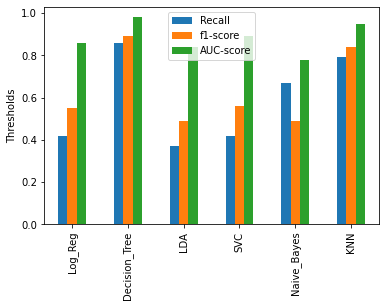

In [430]:
train_params.plot(kind='bar')
plt.ylabel('Thresholds')

<AxesSubplot:>

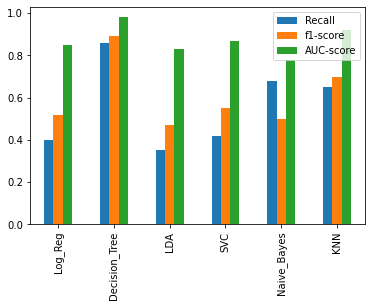

In [431]:
test_params.plot(kind='bar')

In [432]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot3D(train_params['Recall'],train_params['f1-score'],train_params['AUC-score'], 'gray')

## 7. Recommendations provided in business report